Import the libraries

In [1]:
# For data manipulation and analysis
import pandas as pd

# For numerical operations
import numpy as np

# For creating visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# For scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC


# For catboost
!pip install catboost
from catboost import CatBoostClassifier


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# For scikit-learn features
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef, confusion_matrix

#from sklearn.model_selection import 
pd.set_option('display.max_columns', None)
# For regular expressions
import re


# For hyperparameter tuning
! pip install optuna
import optuna
  
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\janes\oslomet\ACIT4510\ACIT4510_alzheimers\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Read the csv file

In [2]:

df = pd.read_csv("data/alzheimers_disease_data.csv")
print(df.head())
RANDOM_STATE = 42
df.info()

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0           13.297218          6.327112     1.347214      9.025679   
1            4.542524          7.619885     0.518767      7.151293   
2           19.555085          7.844988     1.826335      9.673574   
3           12.209266          8.428001     7.435604      8.392554   
4           18.454356          6.310461     0.795498      5.597238   

   FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                        0                     

In [3]:
df.describe().T

# Count duplicated rows in the DataFrame
sum(df.duplicated())

# Drop unnecessary columns from the DataFrame
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)
# Identify numerical columns: columns with more than 10 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

# Identify categorical columns: columns that are not numerical and not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()


Custom labels for the categorical columns

In [4]:
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}


Plot countplots for each categorical column

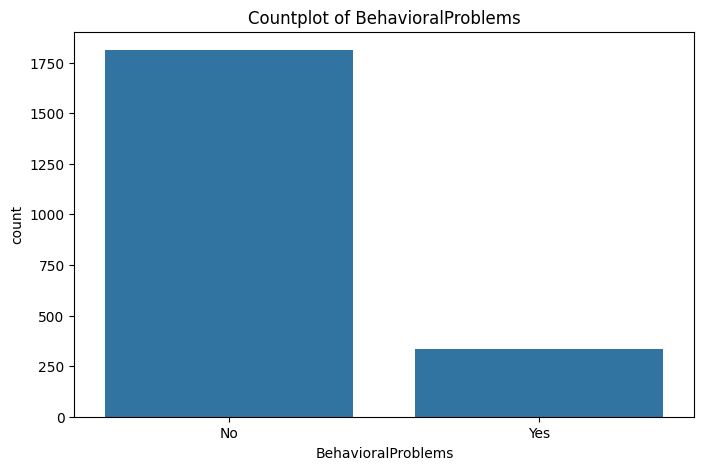

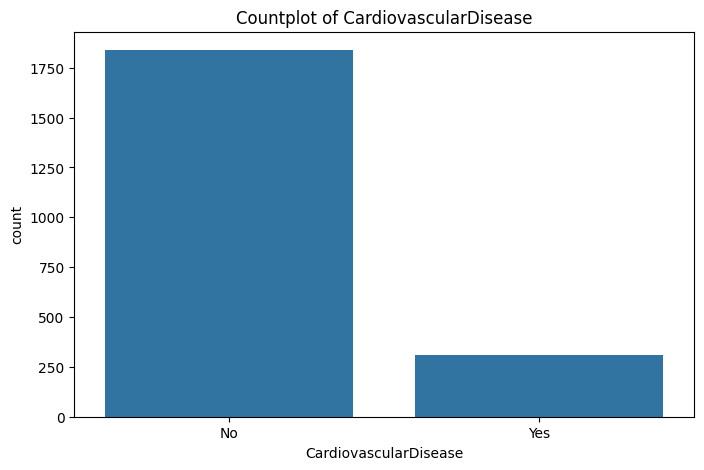

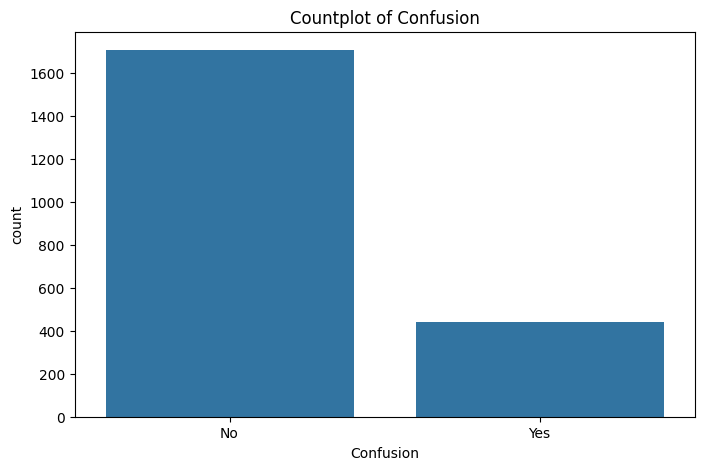

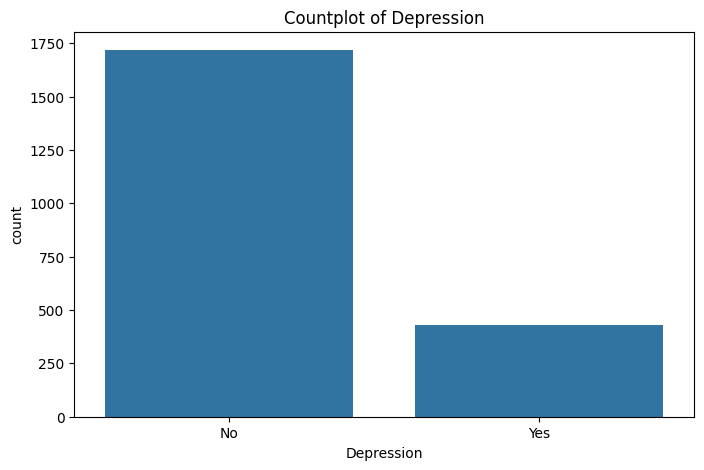

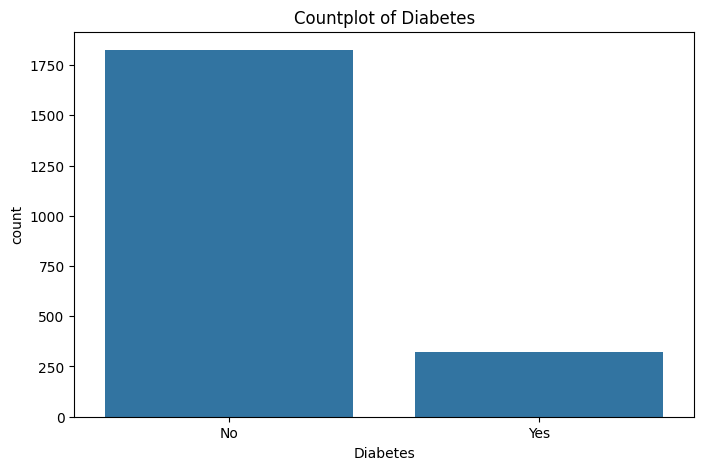

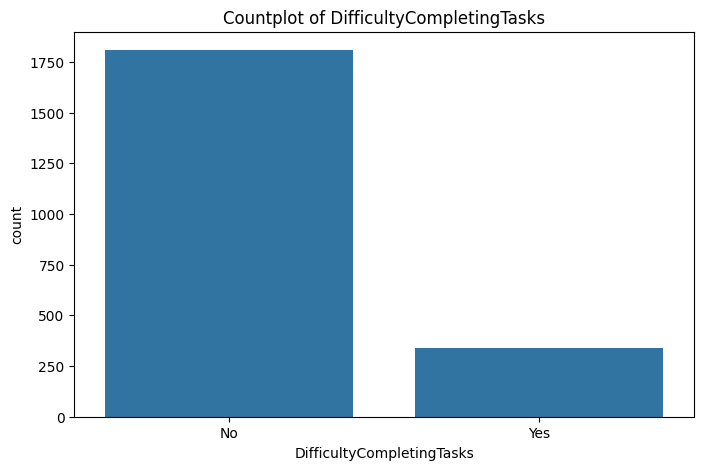

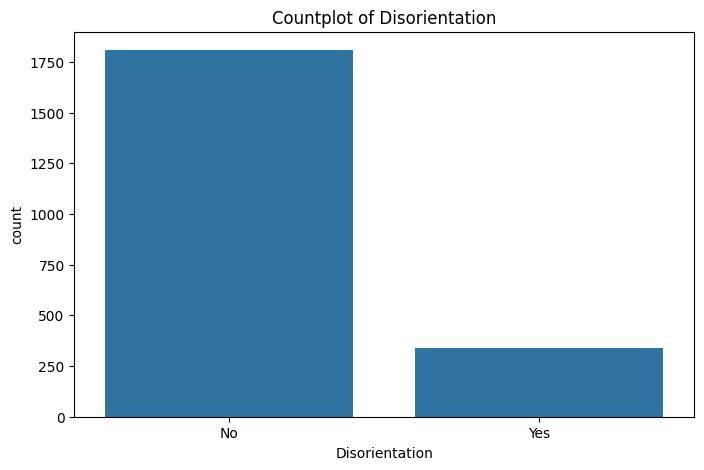

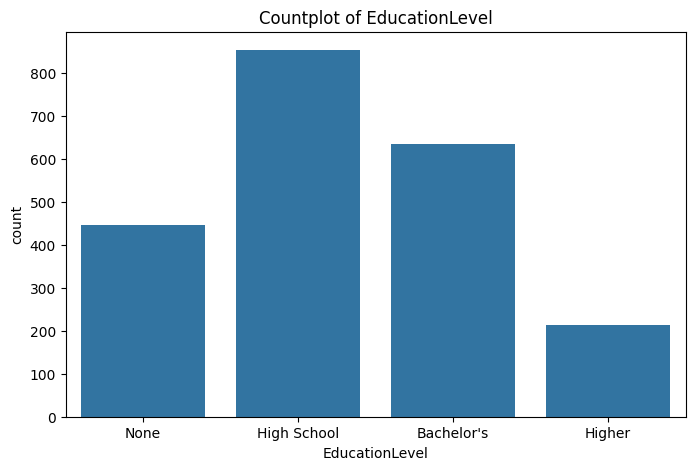

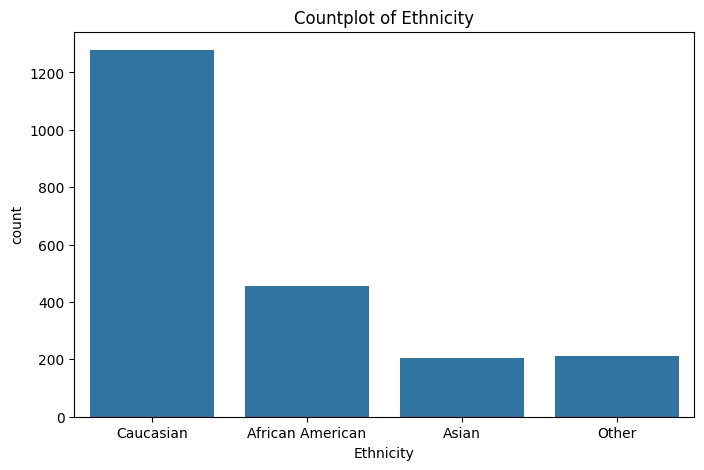

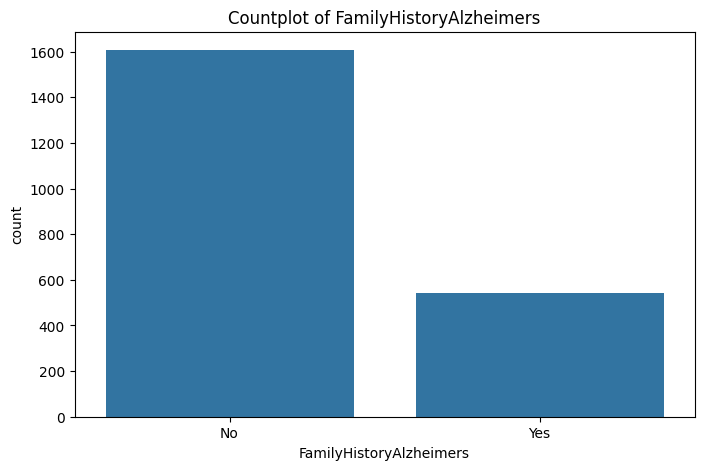

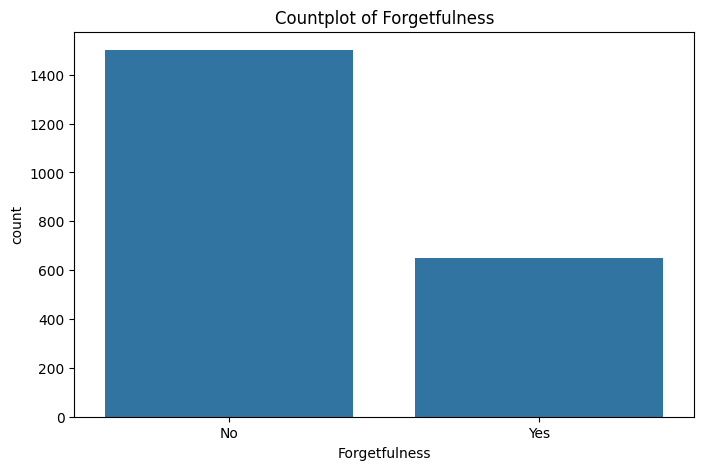

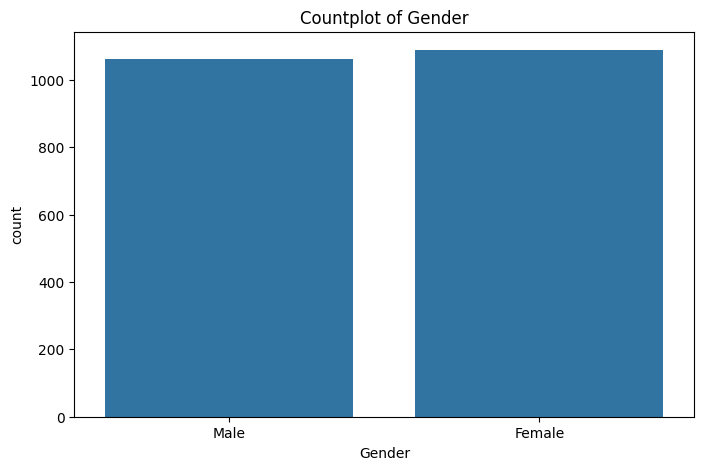

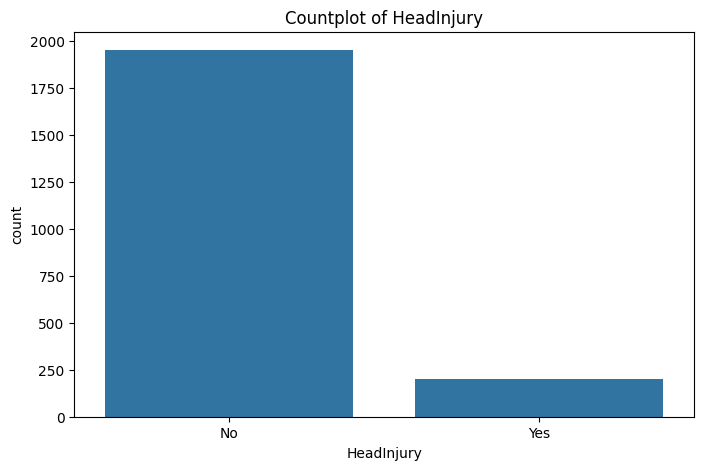

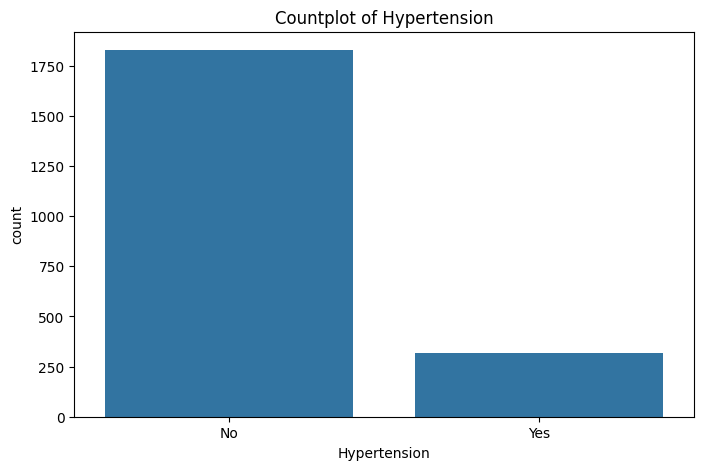

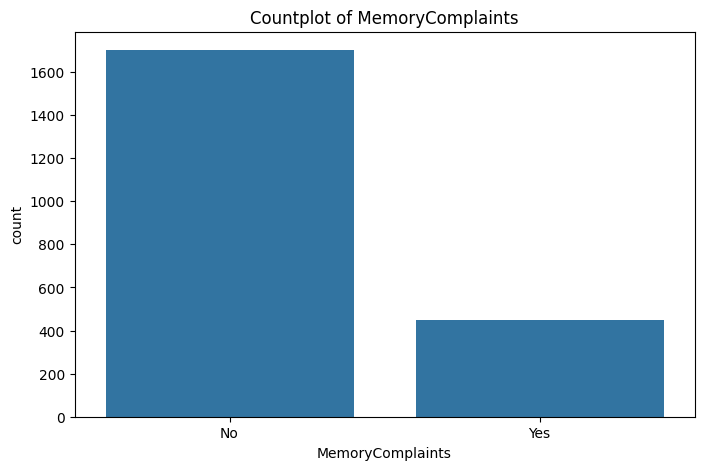

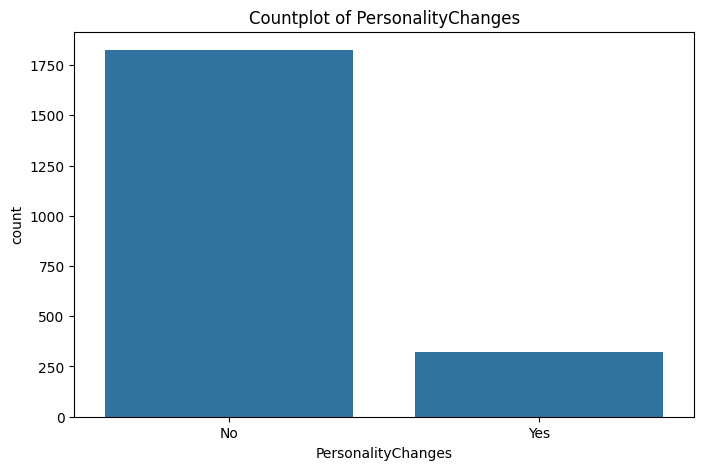

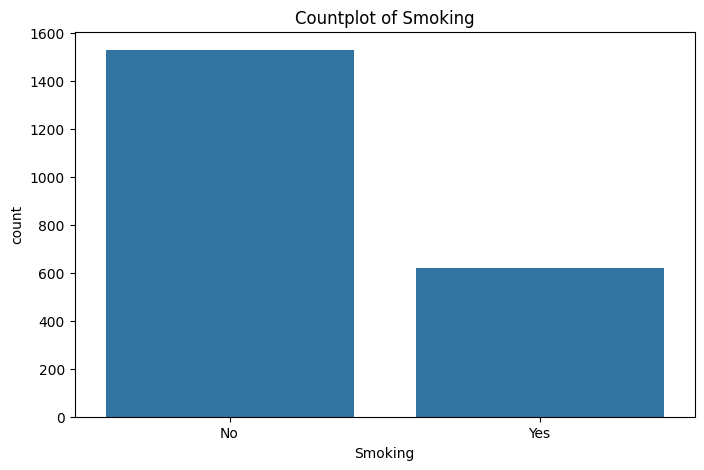

In [5]:
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}
# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    
    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.show()


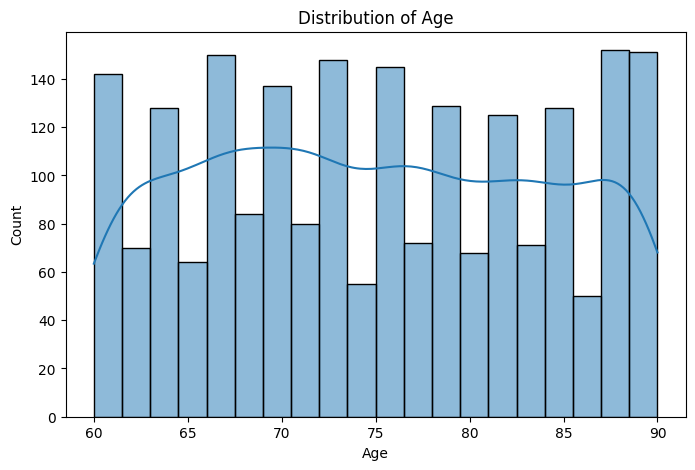

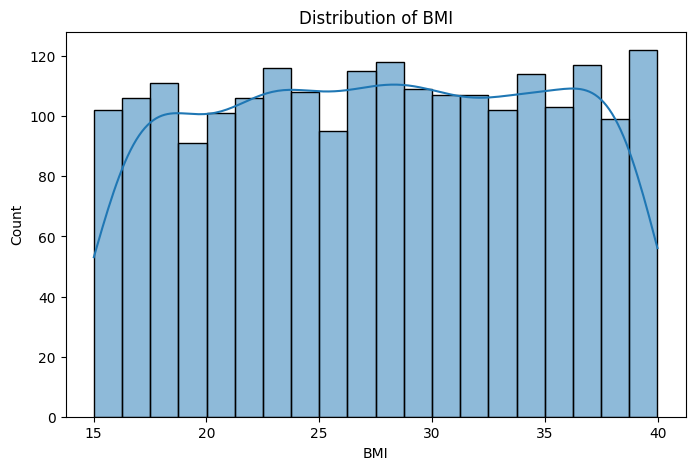

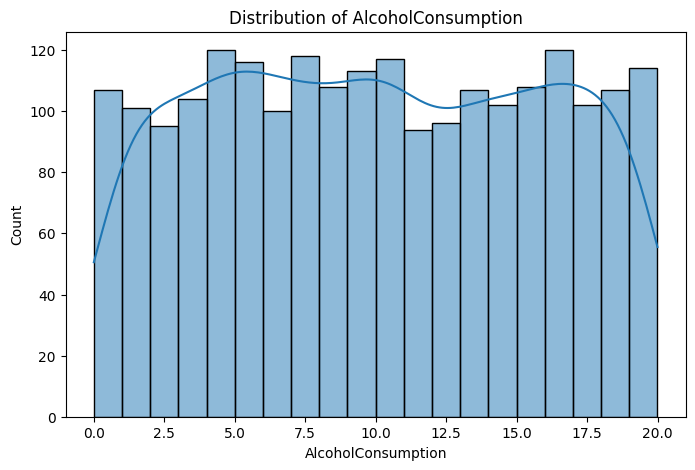

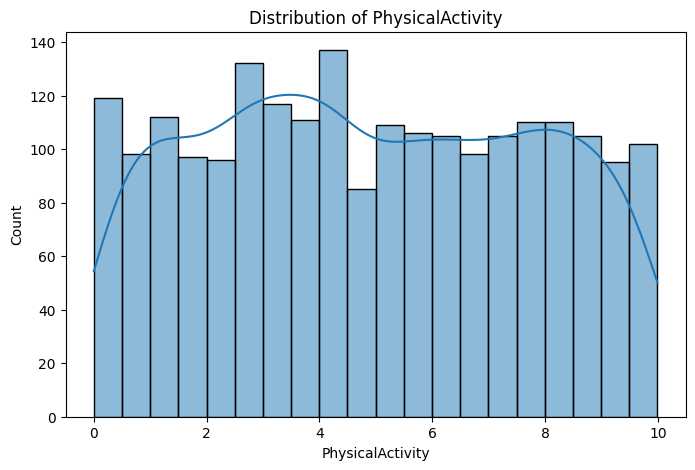

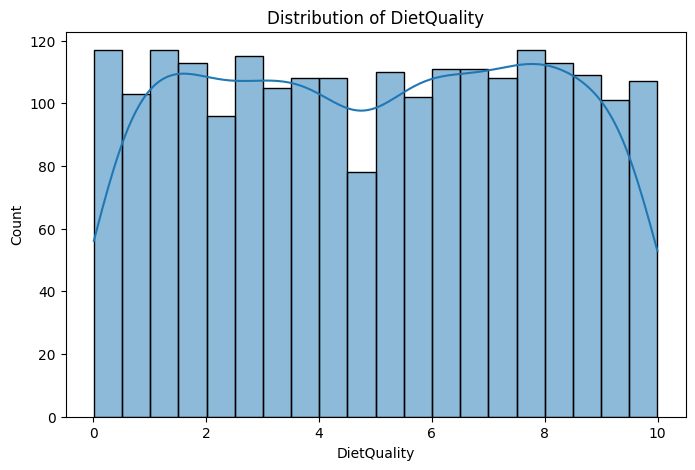

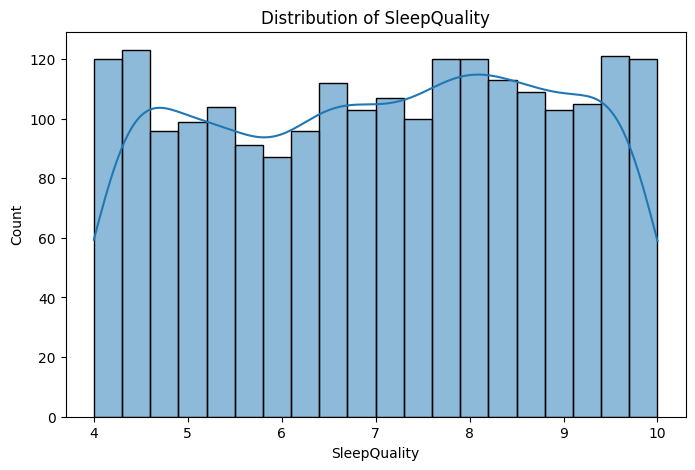

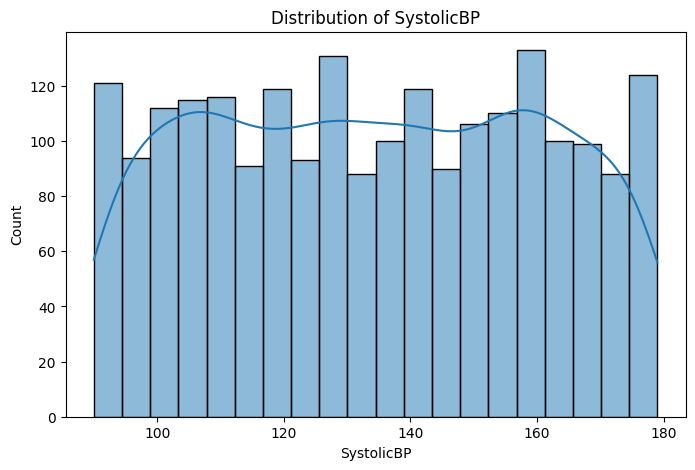

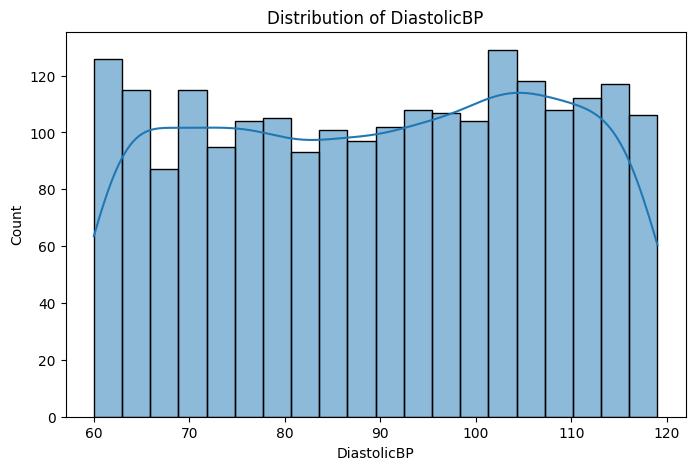

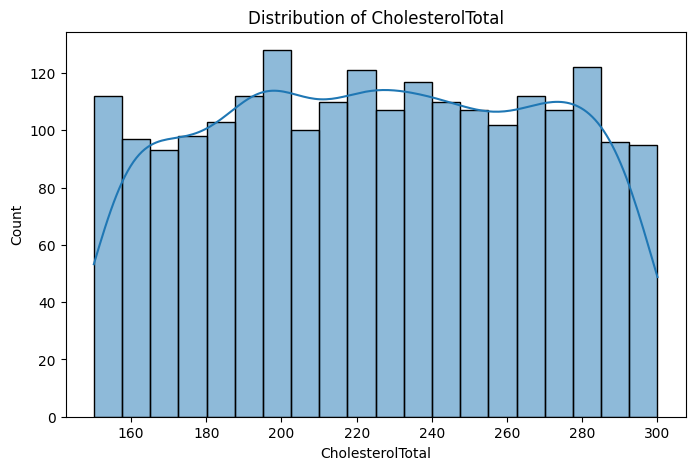

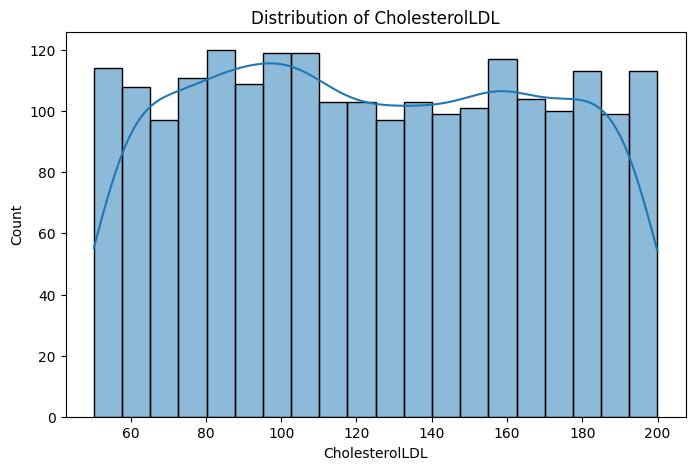

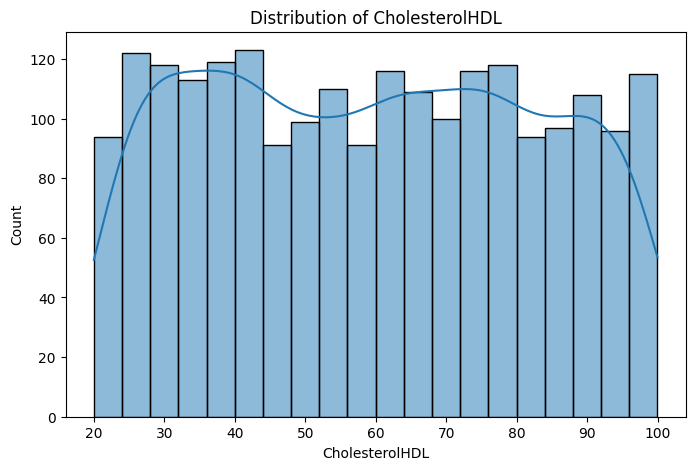

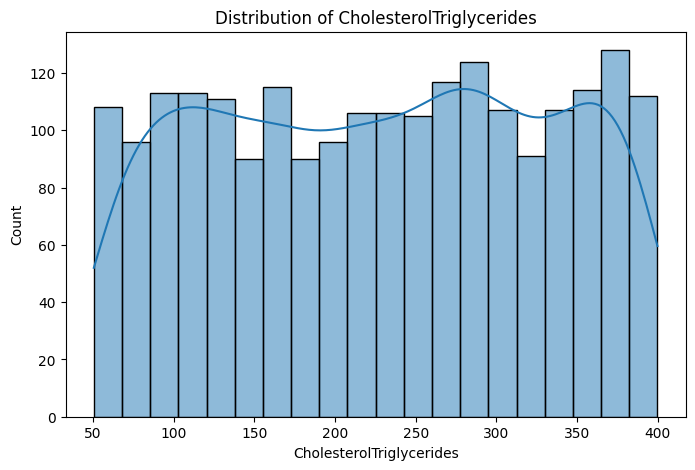

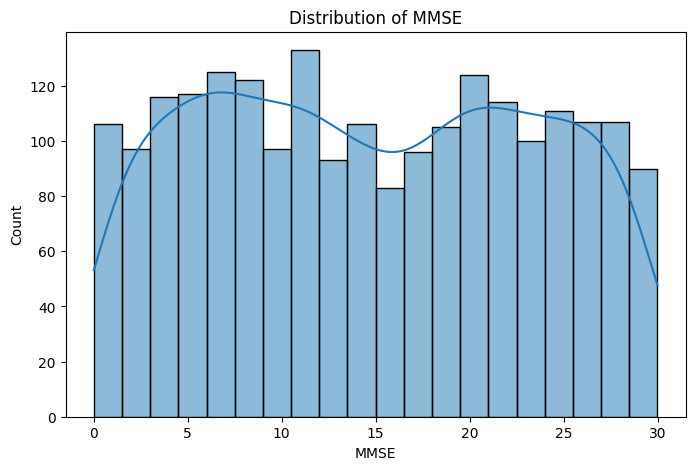

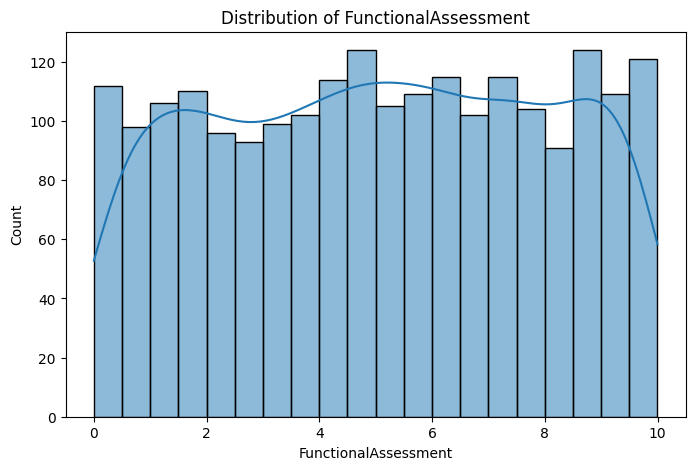

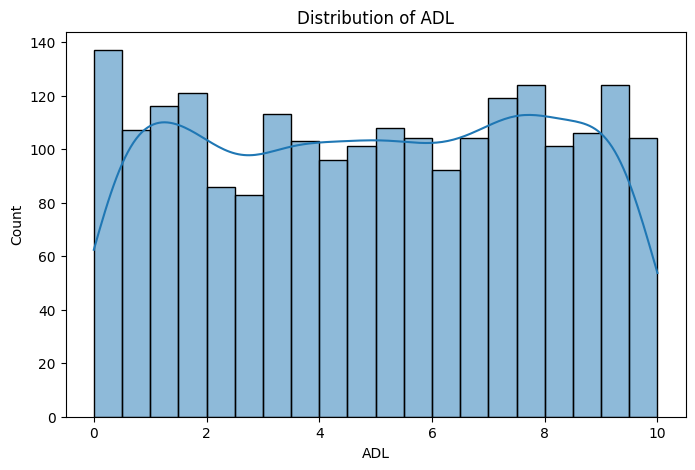

In [6]:
#Visulisation of the numerical values:
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

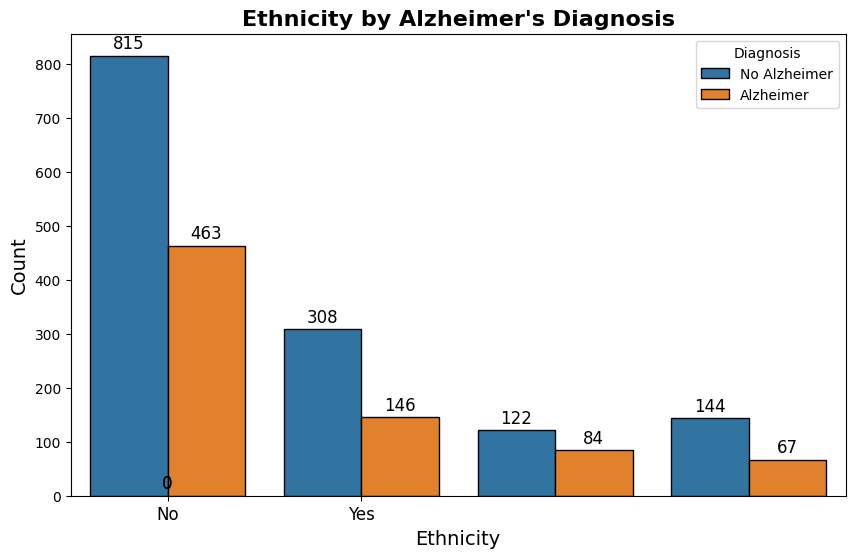

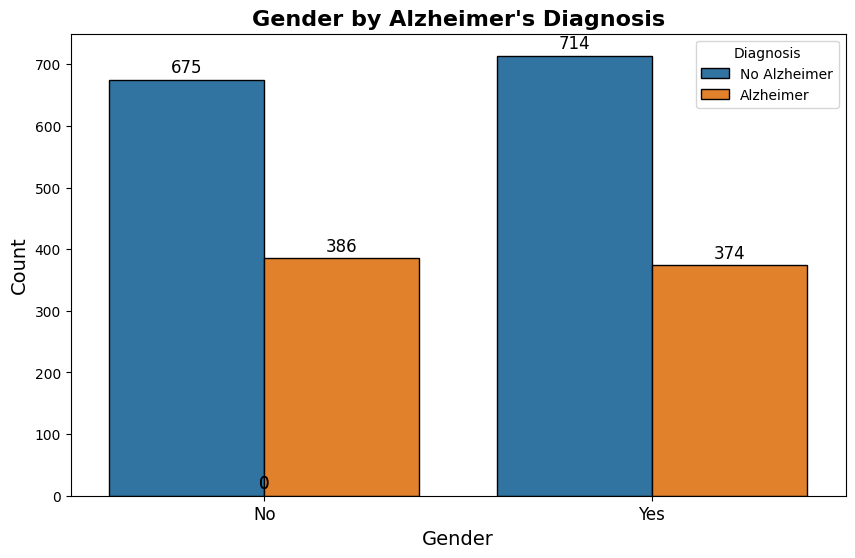

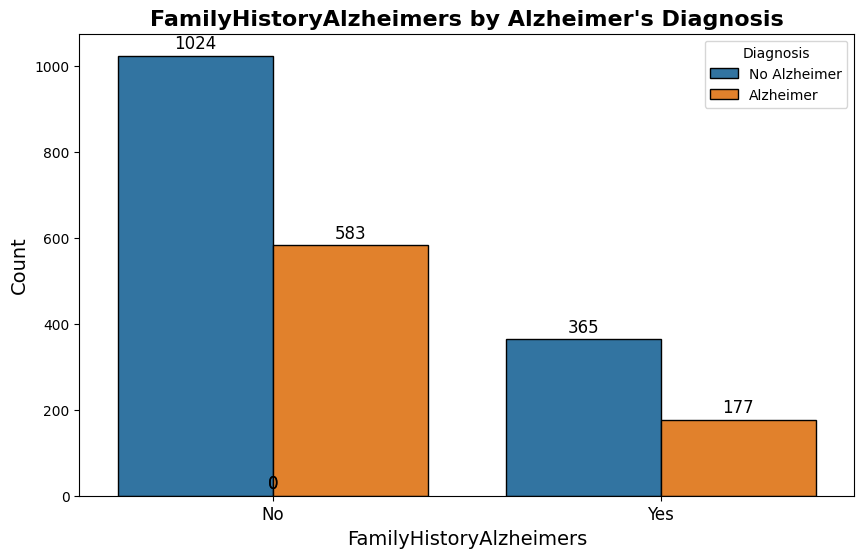

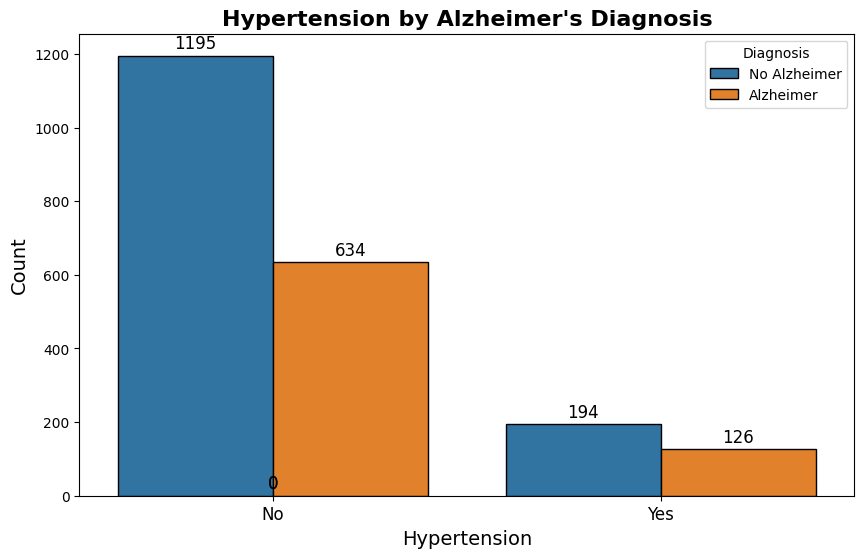

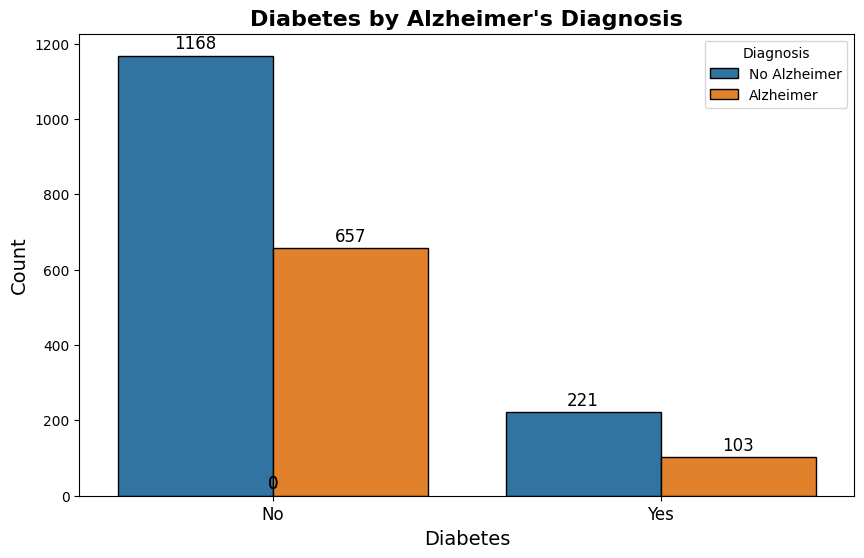

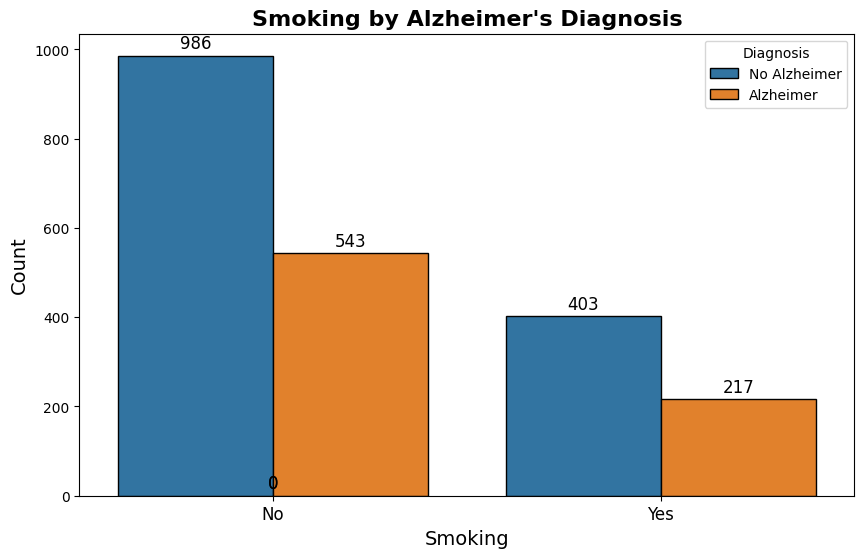

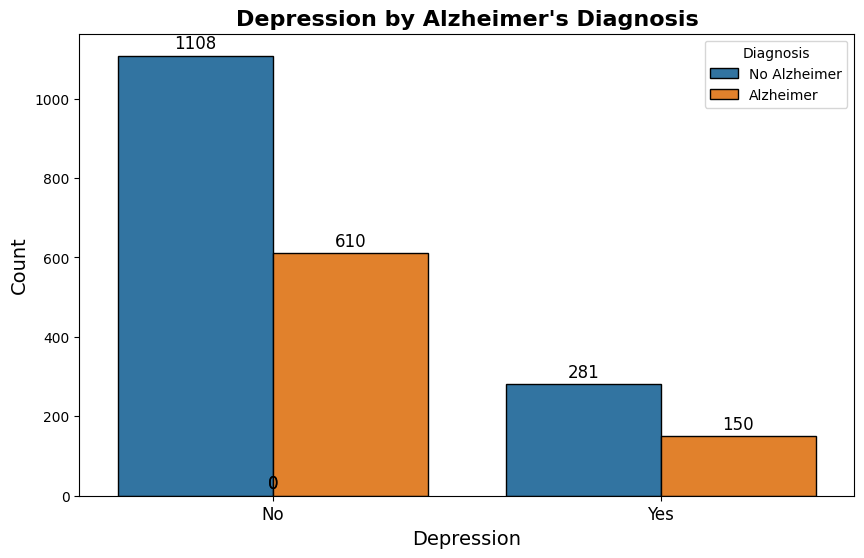

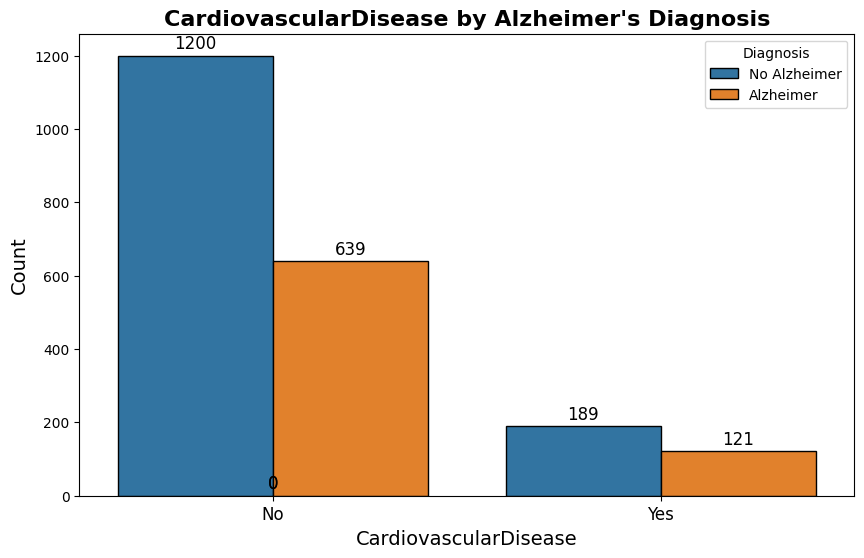

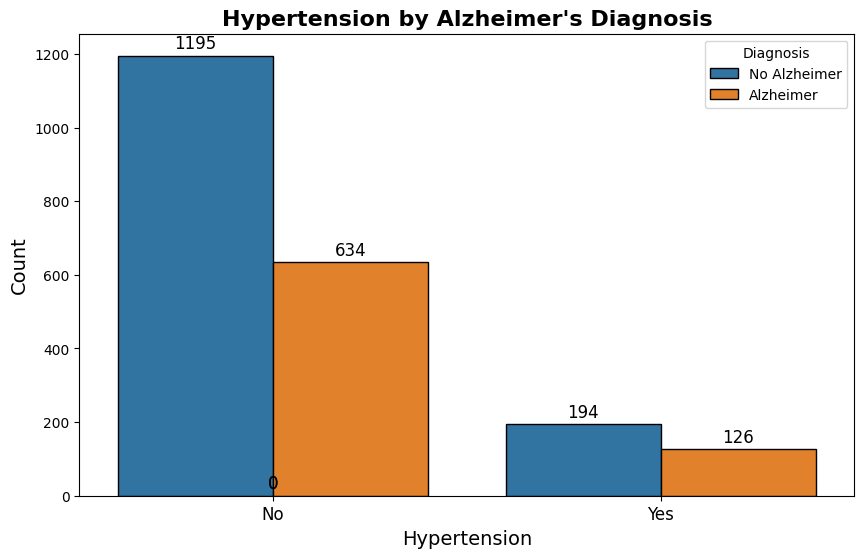

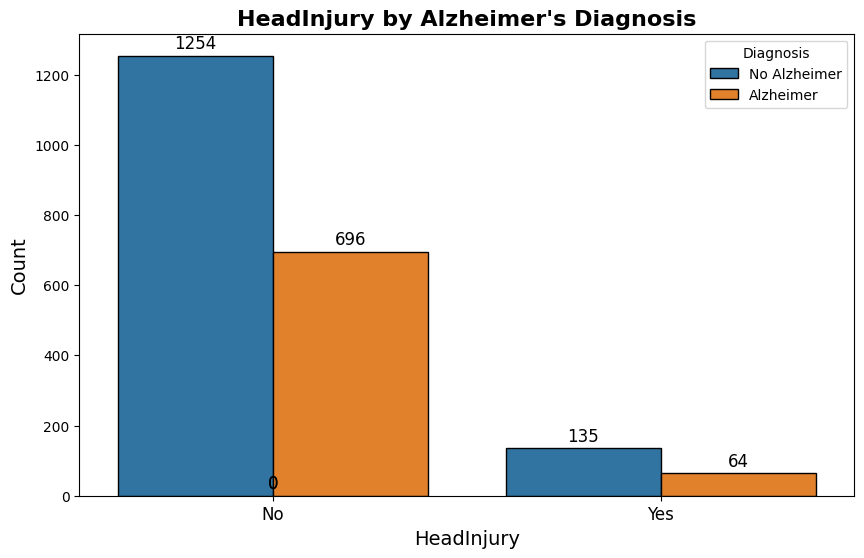

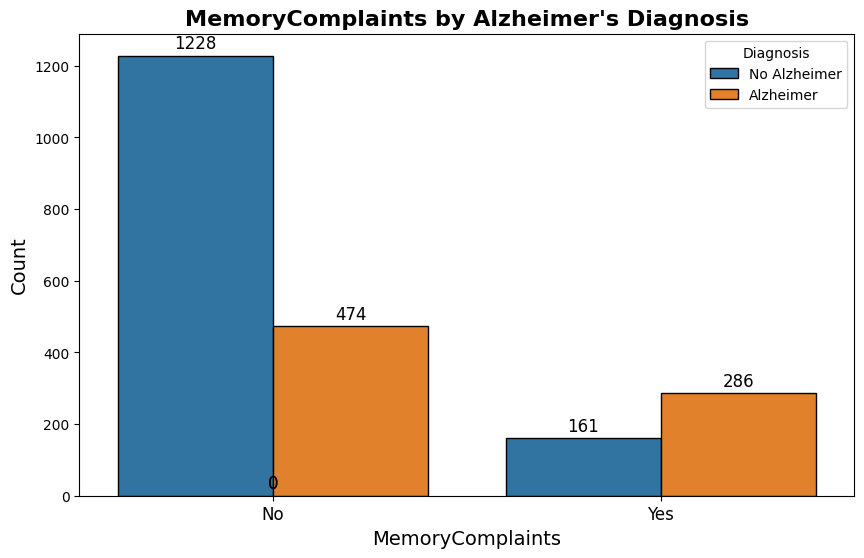

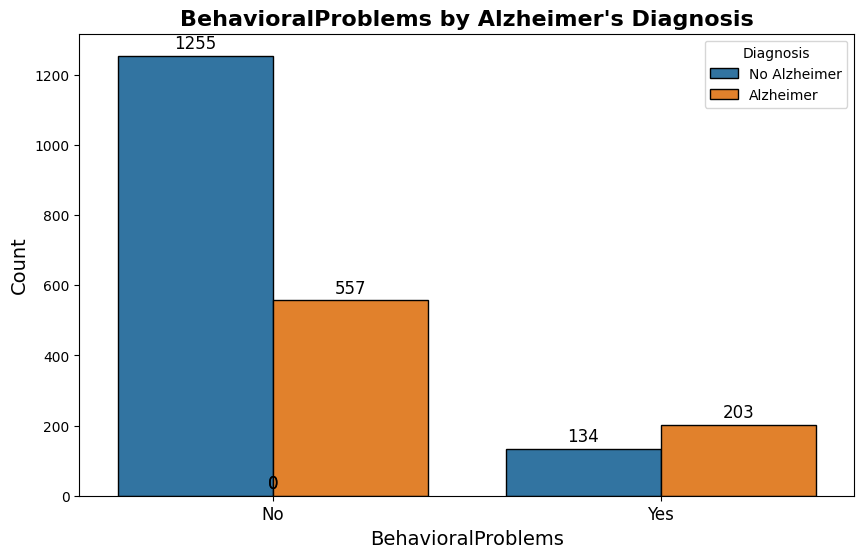

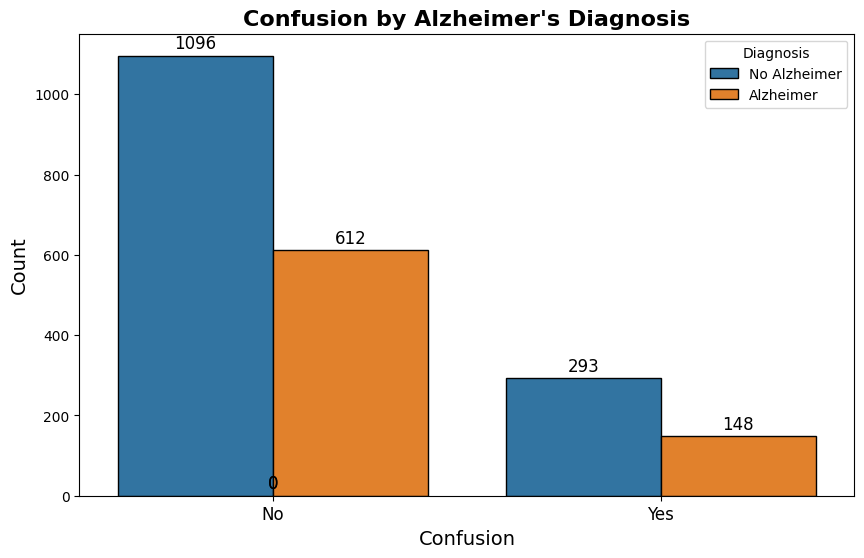

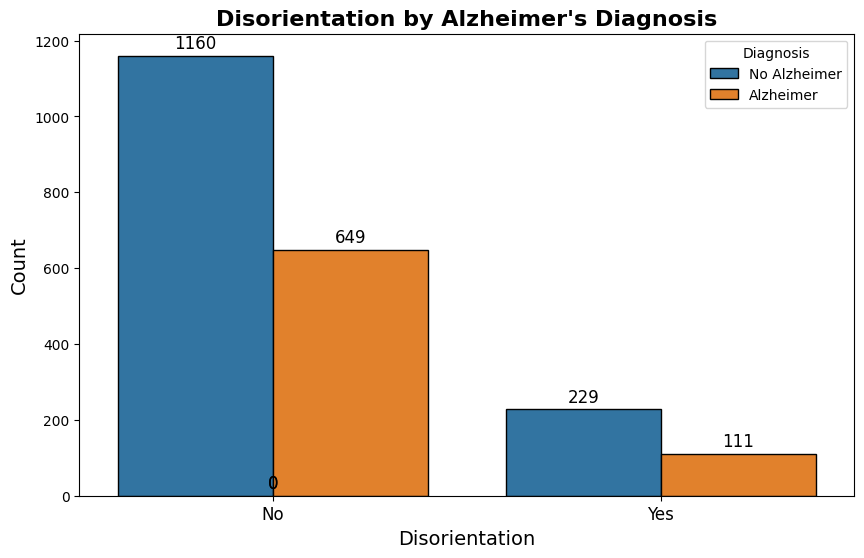

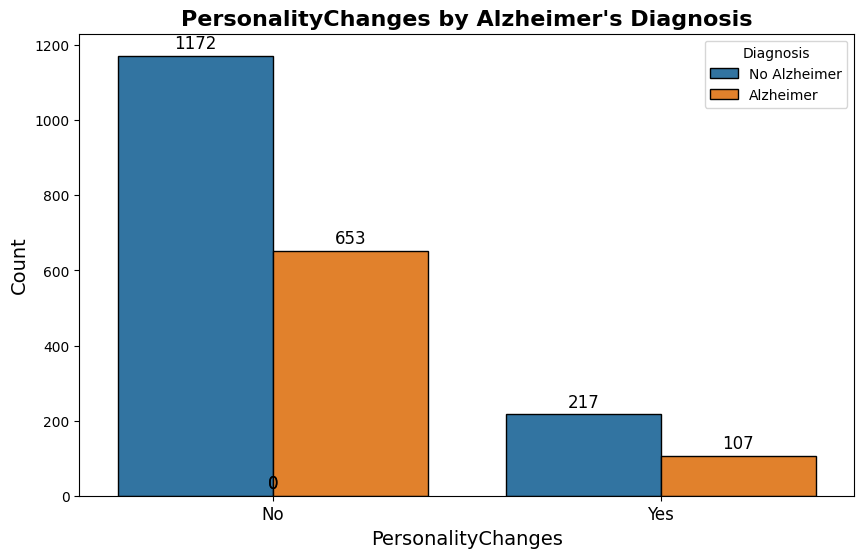

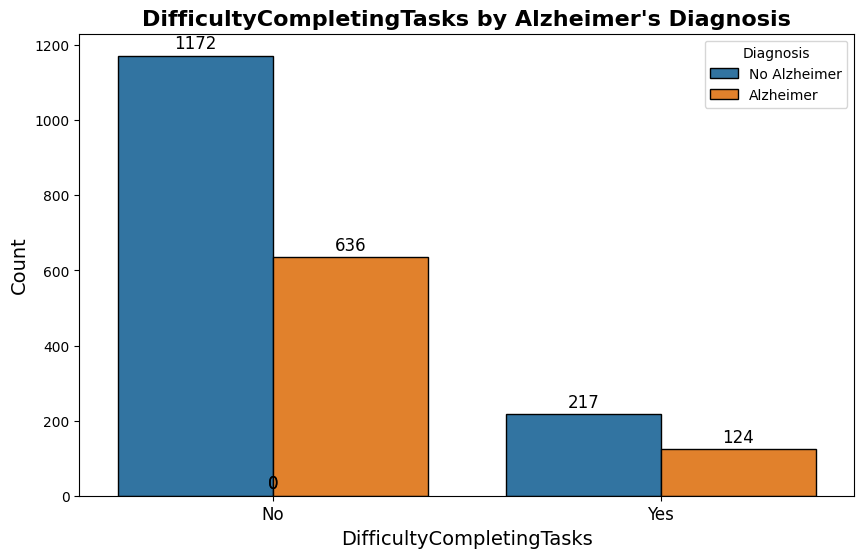

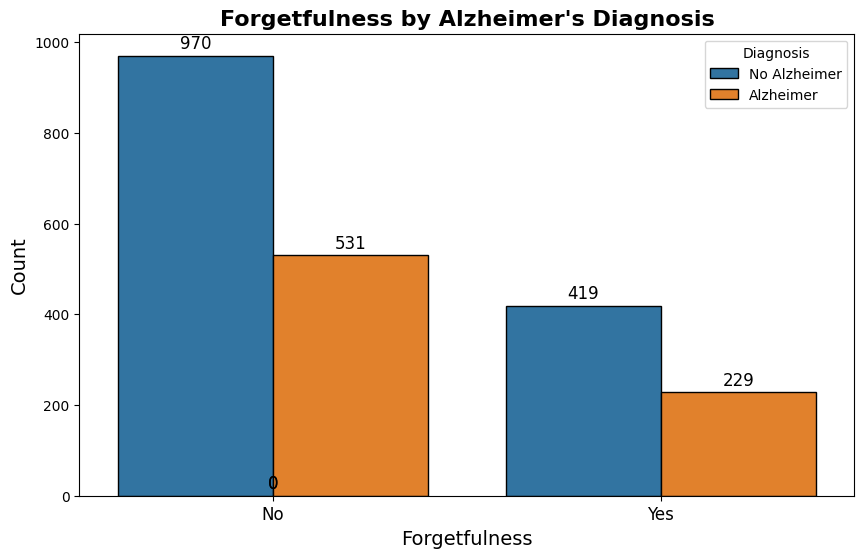

In [7]:

binary_vars = [ 'Ethnicity','Gender','FamilyHistoryAlzheimers', 'Hypertension', 'Diabetes', 'Smoking', 'Depression','CardiovascularDisease', 'Hypertension','HeadInjury','MemoryComplaints', 'BehavioralProblems' , 'Confusion' ,'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']

# Loop to generate count plots for each binary variable
for var in binary_vars:
    plt.figure(figsize=(10, 6))  # Set the size of the figure
    ax = sns.countplot(x=var, hue='Diagnosis', data=df, palette=["#1f77b4", "#ff7f0e"], edgecolor='black')
    
    # Set title and labels
    plt.title(f'{var} by Alzheimer\'s Diagnosis', fontsize=16, fontweight='bold')
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Set custom x-axis labels assuming 0 is 'No' and 1 is 'Yes'
    plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)
    
    # Add a legend with custom labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnosis')
    
    # Add count numbers on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
    # Remove grid lines for cleaner appearance
    plt.grid(False)
    
    # Display the plot
    plt.show()
    


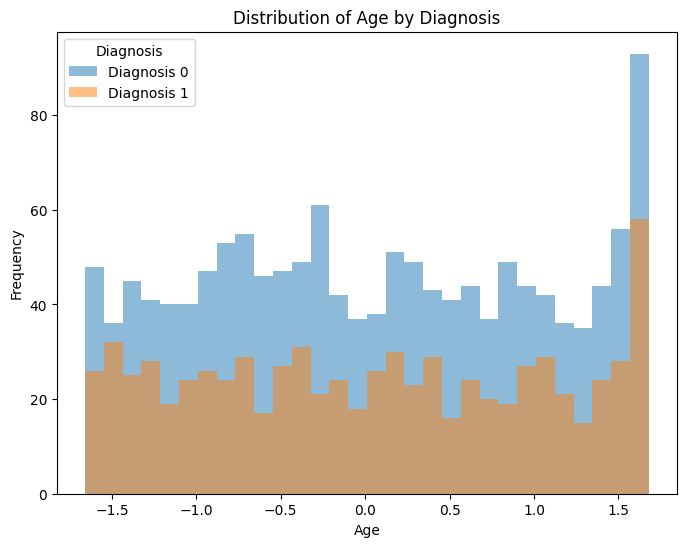

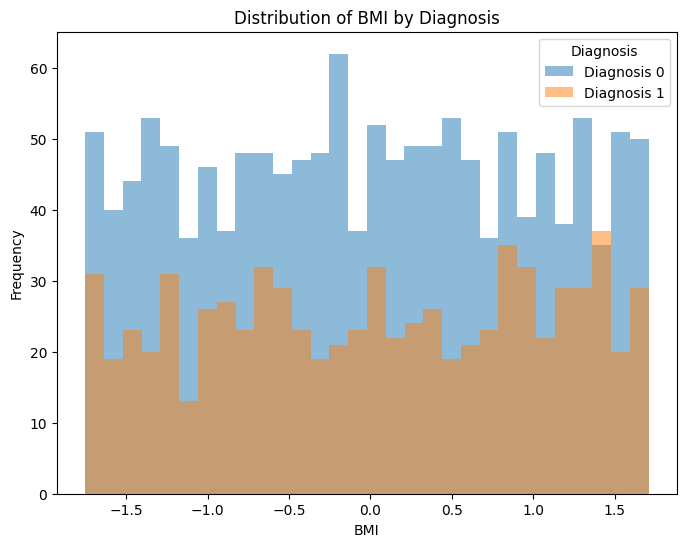

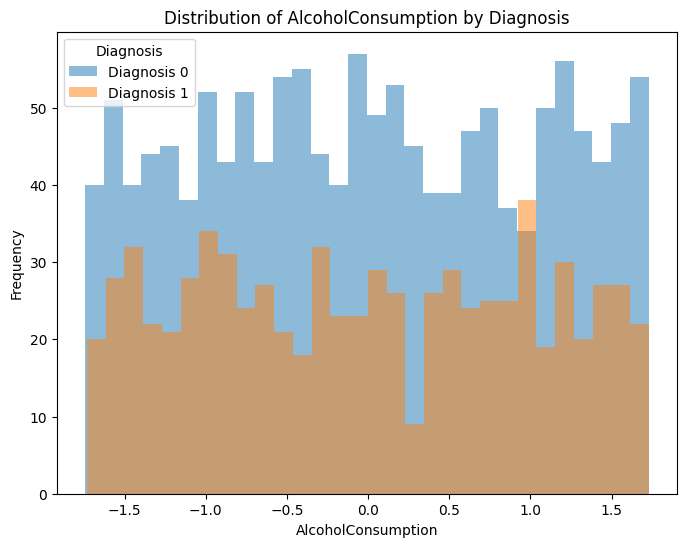

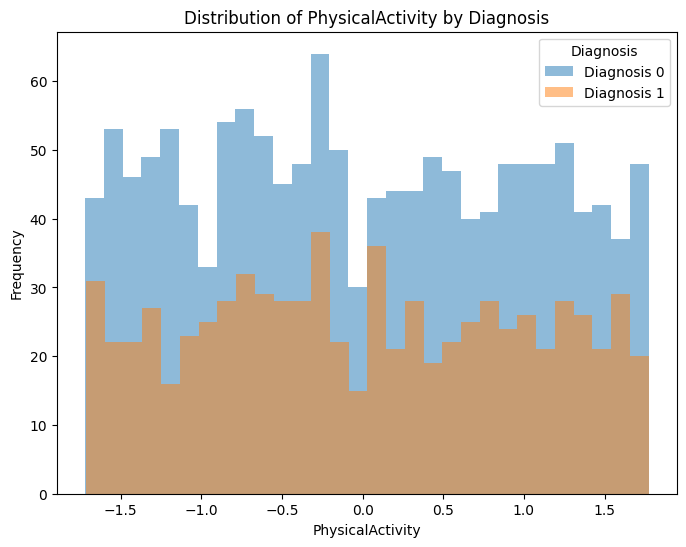

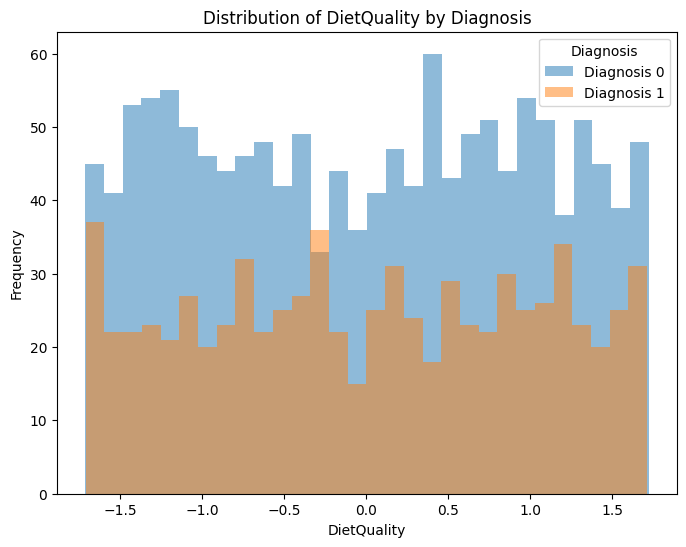

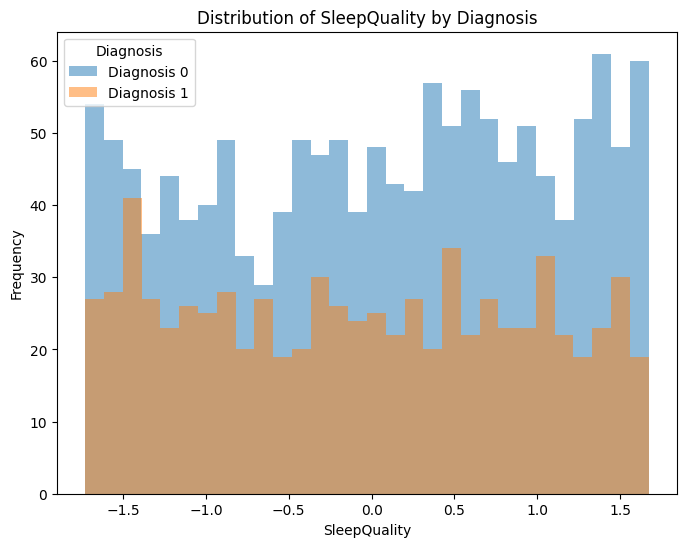

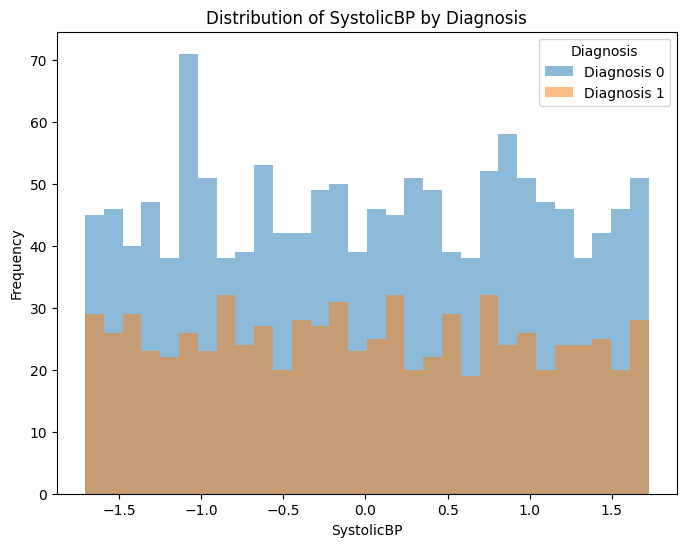

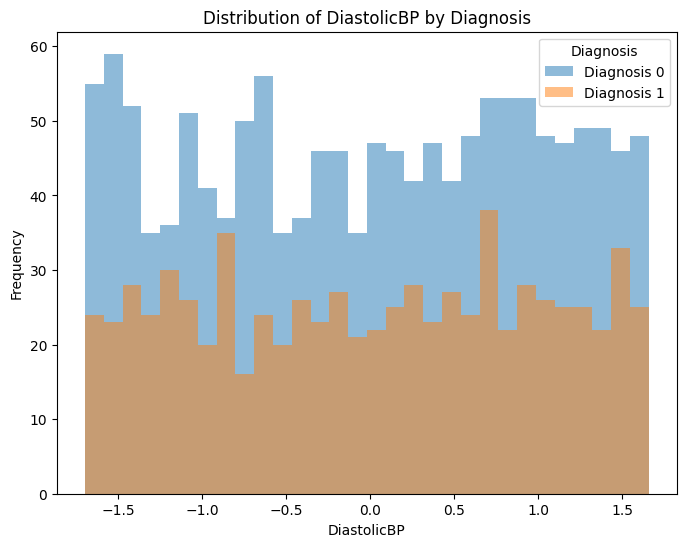

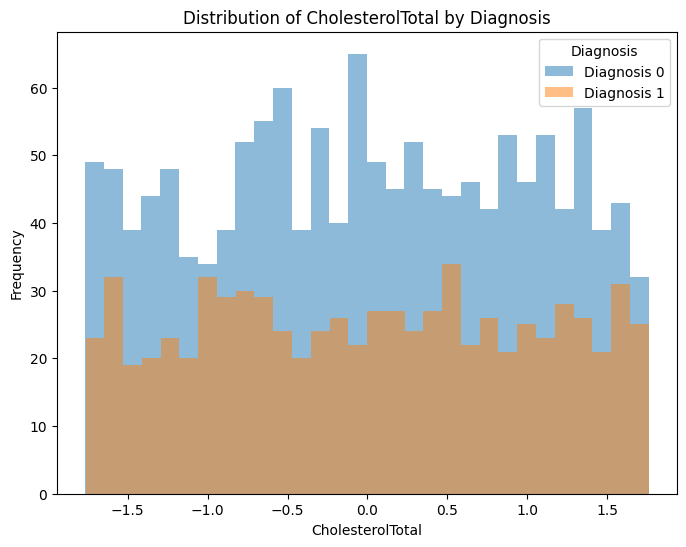

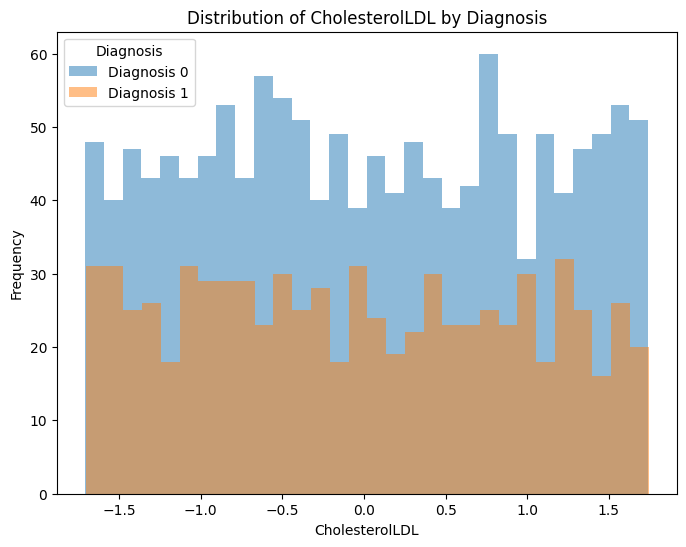

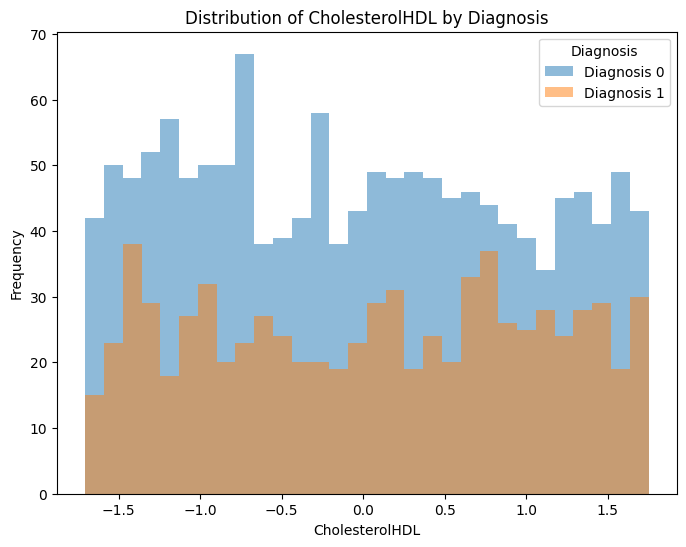

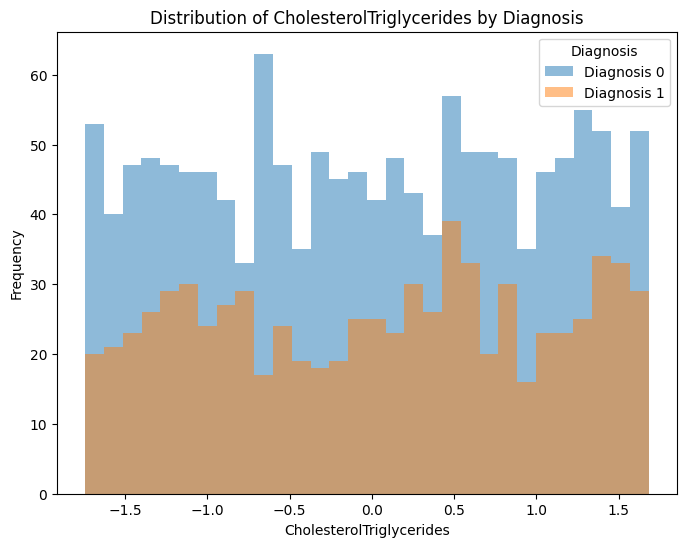

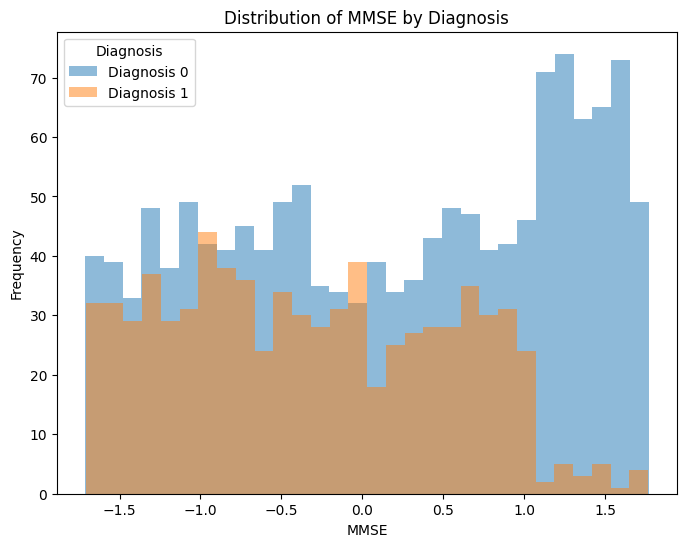

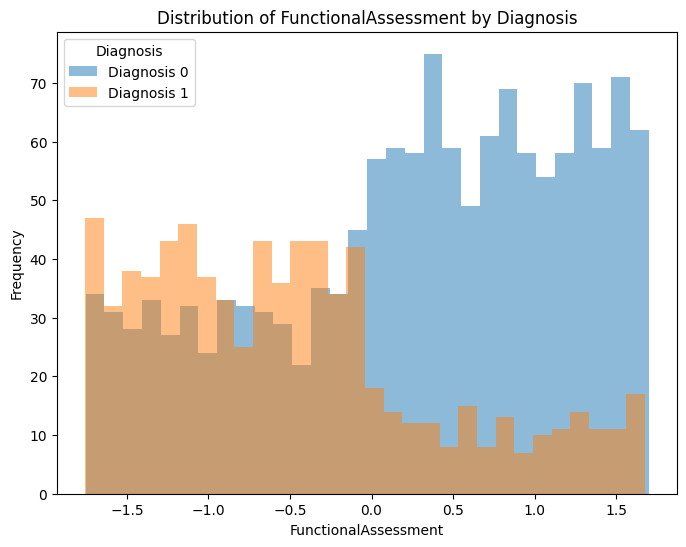

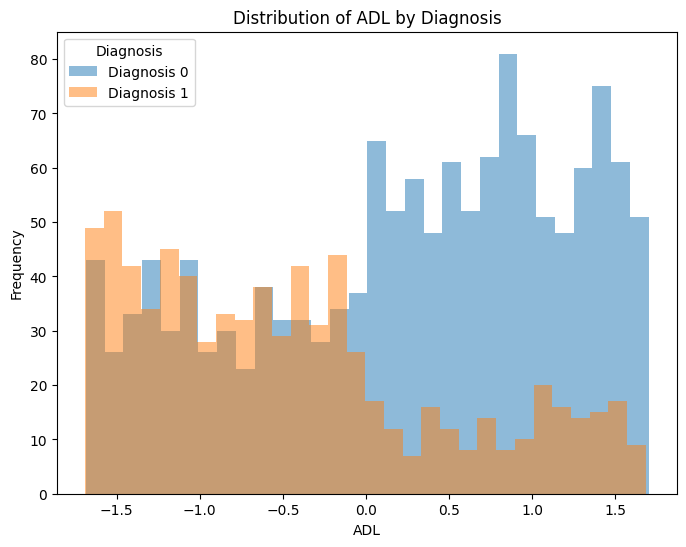

In [40]:
diagnosis_groups = df.groupby('Diagnosis')

# Plot each numerical column against Diagnosis
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    for diagnosis, group in diagnosis_groups:
        plt.hist(group[col], bins=30, alpha=0.5, label=f'Diagnosis {diagnosis}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title="Diagnosis")
    plt.title(f'Distribution of {col} by Diagnosis')
    plt.show()

Observations from Visualization of Categorical Features
The dataset consists of individuals without disease or health problems.
Caucasian are the most represented demographic
The largest educational group are High school graduates, followed by individuals with a bachelor's degree.
Both females and males are equally represented across the dataset


There are five columns correlated with the target variable.
Three numerical features—`Functional Assessment`, `ADL` (Activities of Daily Living), and `MMSE` (Mini-Mental State Examination)—are NEGATIVLIY correlated with the `diagnosis of Alzheimer's disease`, with correlation coefficients of -0.36, -0.33, and -0.24 respectively. This indicates that lower scores in these assessments are associated with a higher likelihood of an Alzheimer's diagnosis.
Additionally, two categorical variables—`Behavioral Problems` and `Memory Complaints`—are POSITIVLY correlated with the `diagnosis`, with correlation coefficients of 0.22 and 0.30 respectively. This means the presence of these issues is associated with a higher likelihood of an Alzheimer's diagnosis, highlighting their significance in the diagnostic process.

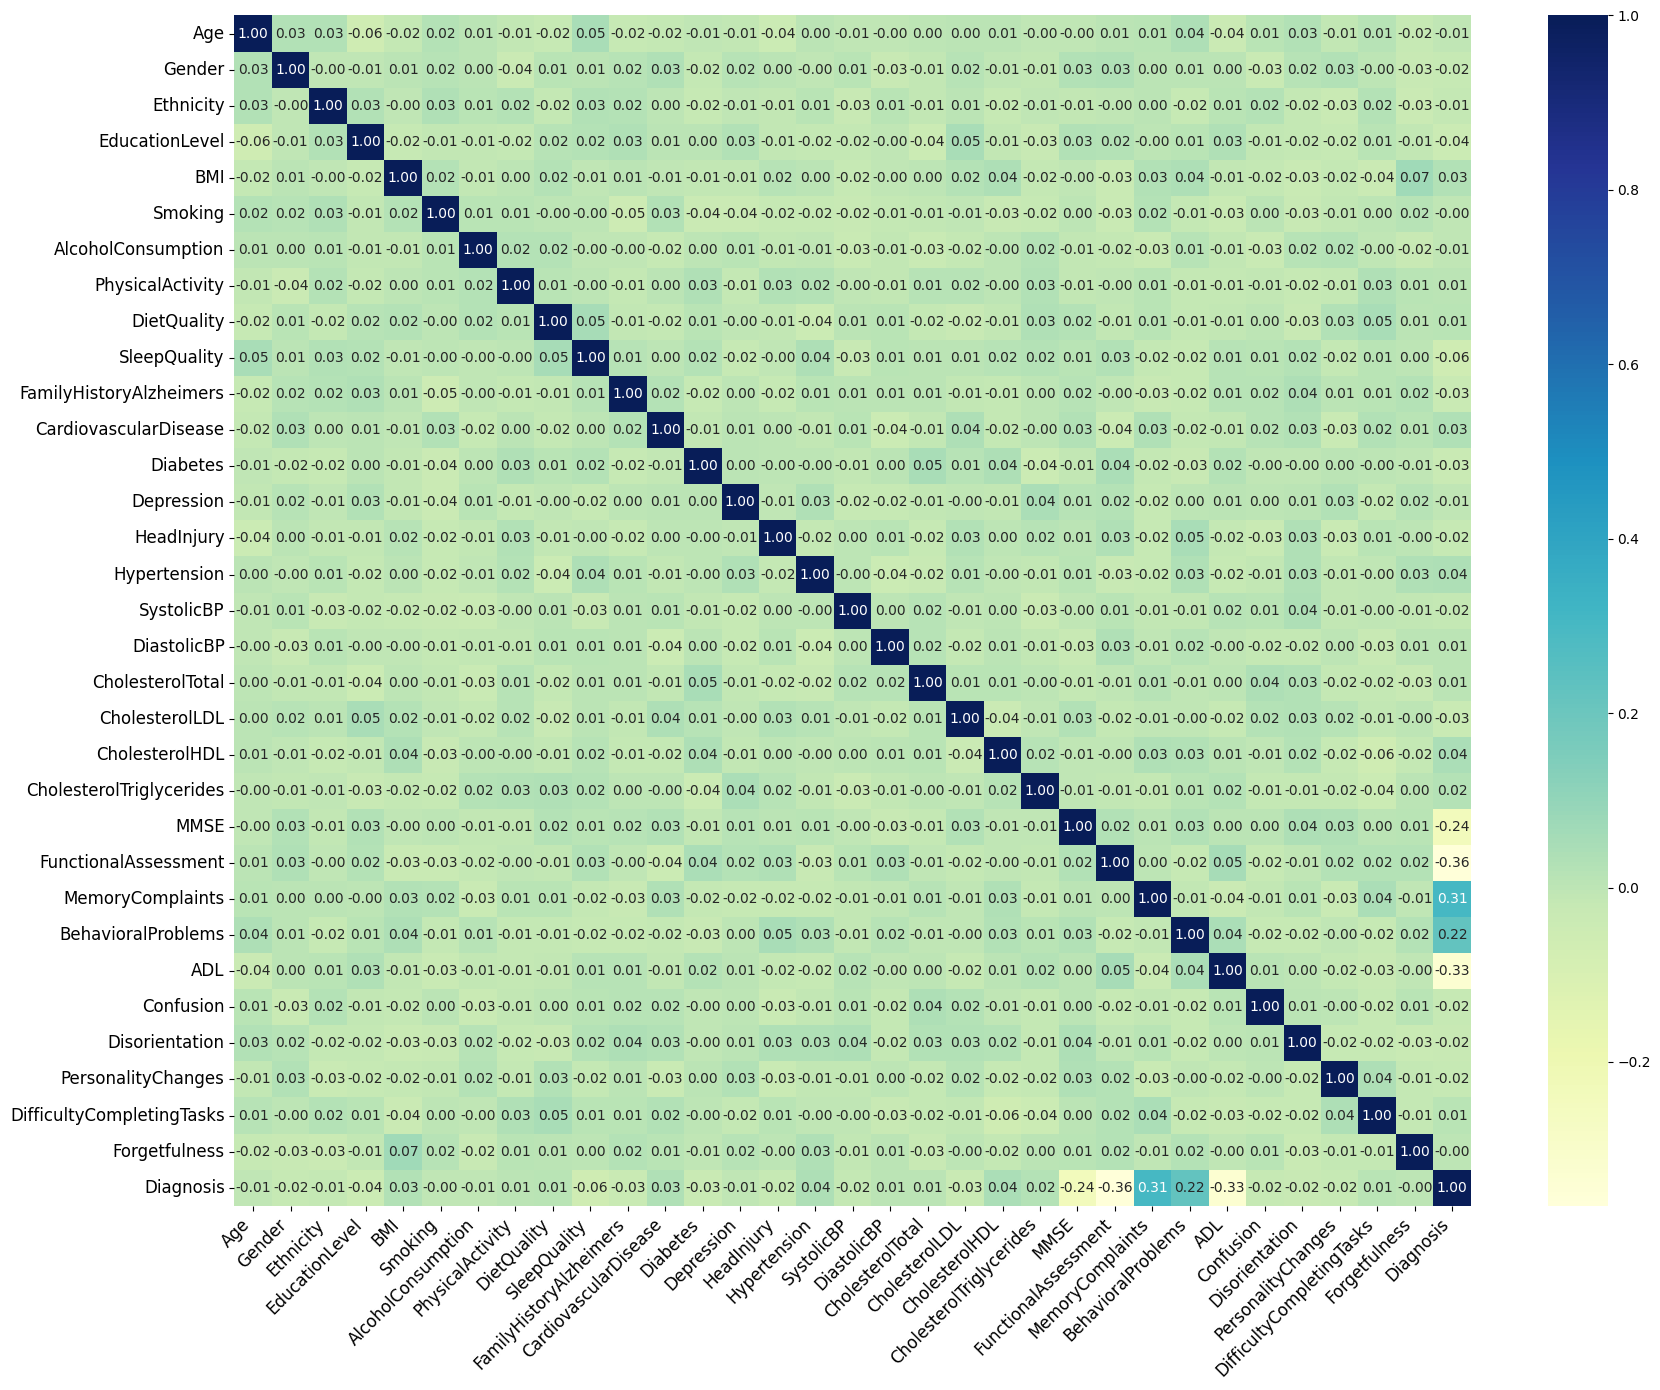

In [8]:
# Filtering only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include='number')

# Heat map analysis with the corrected data
plt.figure(figsize=(18, 14))
sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Numerical Variables vs Diagnosis



Calculate Pearson correlation coefficient, also known as Pearson's r. It is a measure of the linear relationship between two variables. It quantifies the degree to which a pair of variables are linearly related, ranging from -1 to 1.

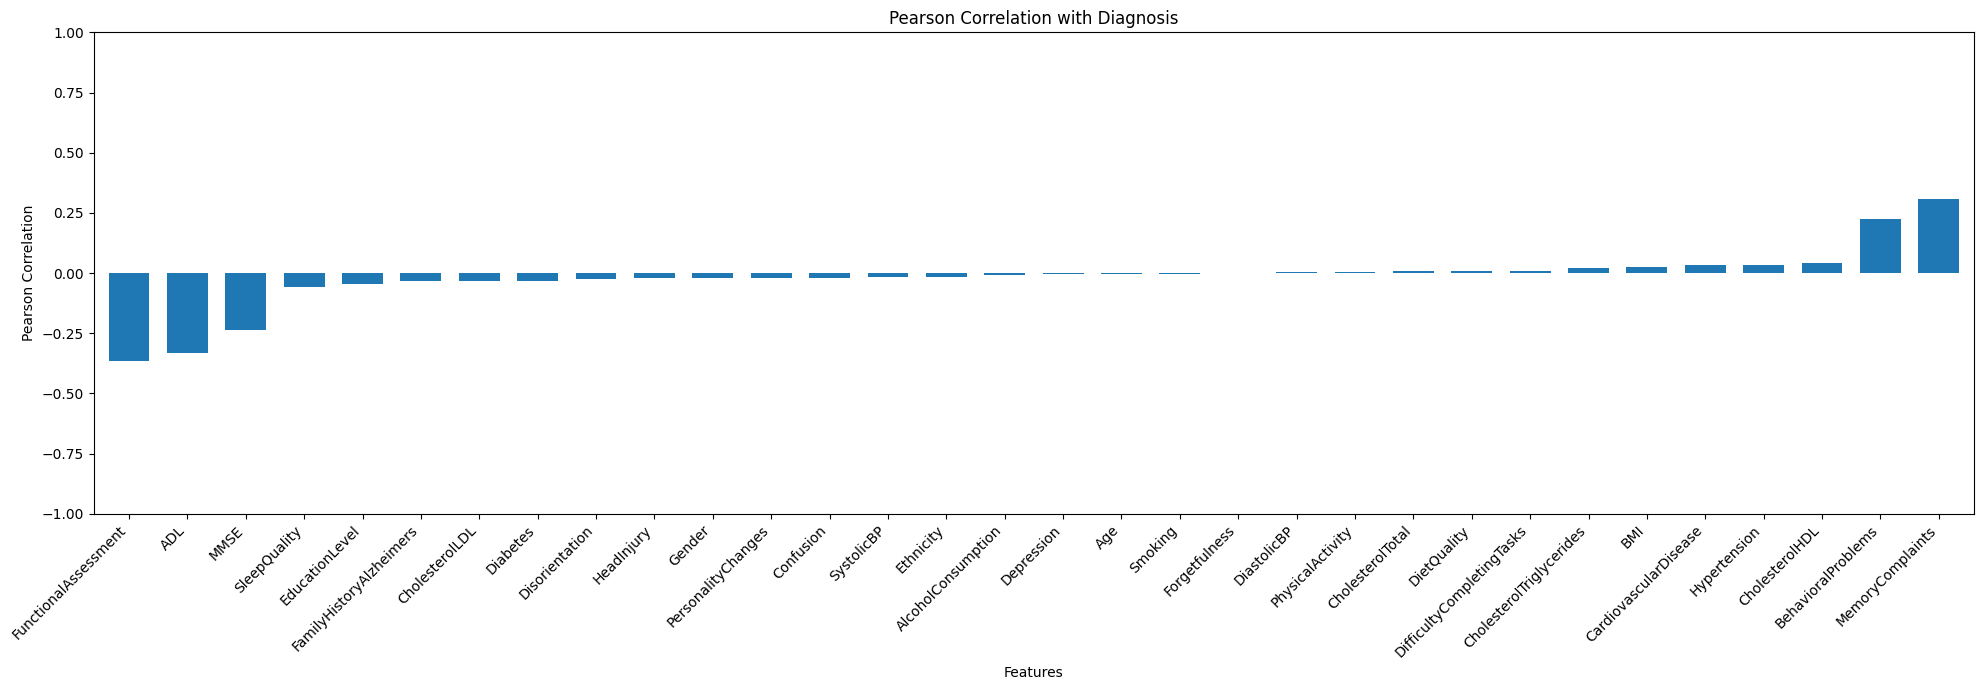

In [9]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Diagnosis')


# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()

plt.show()

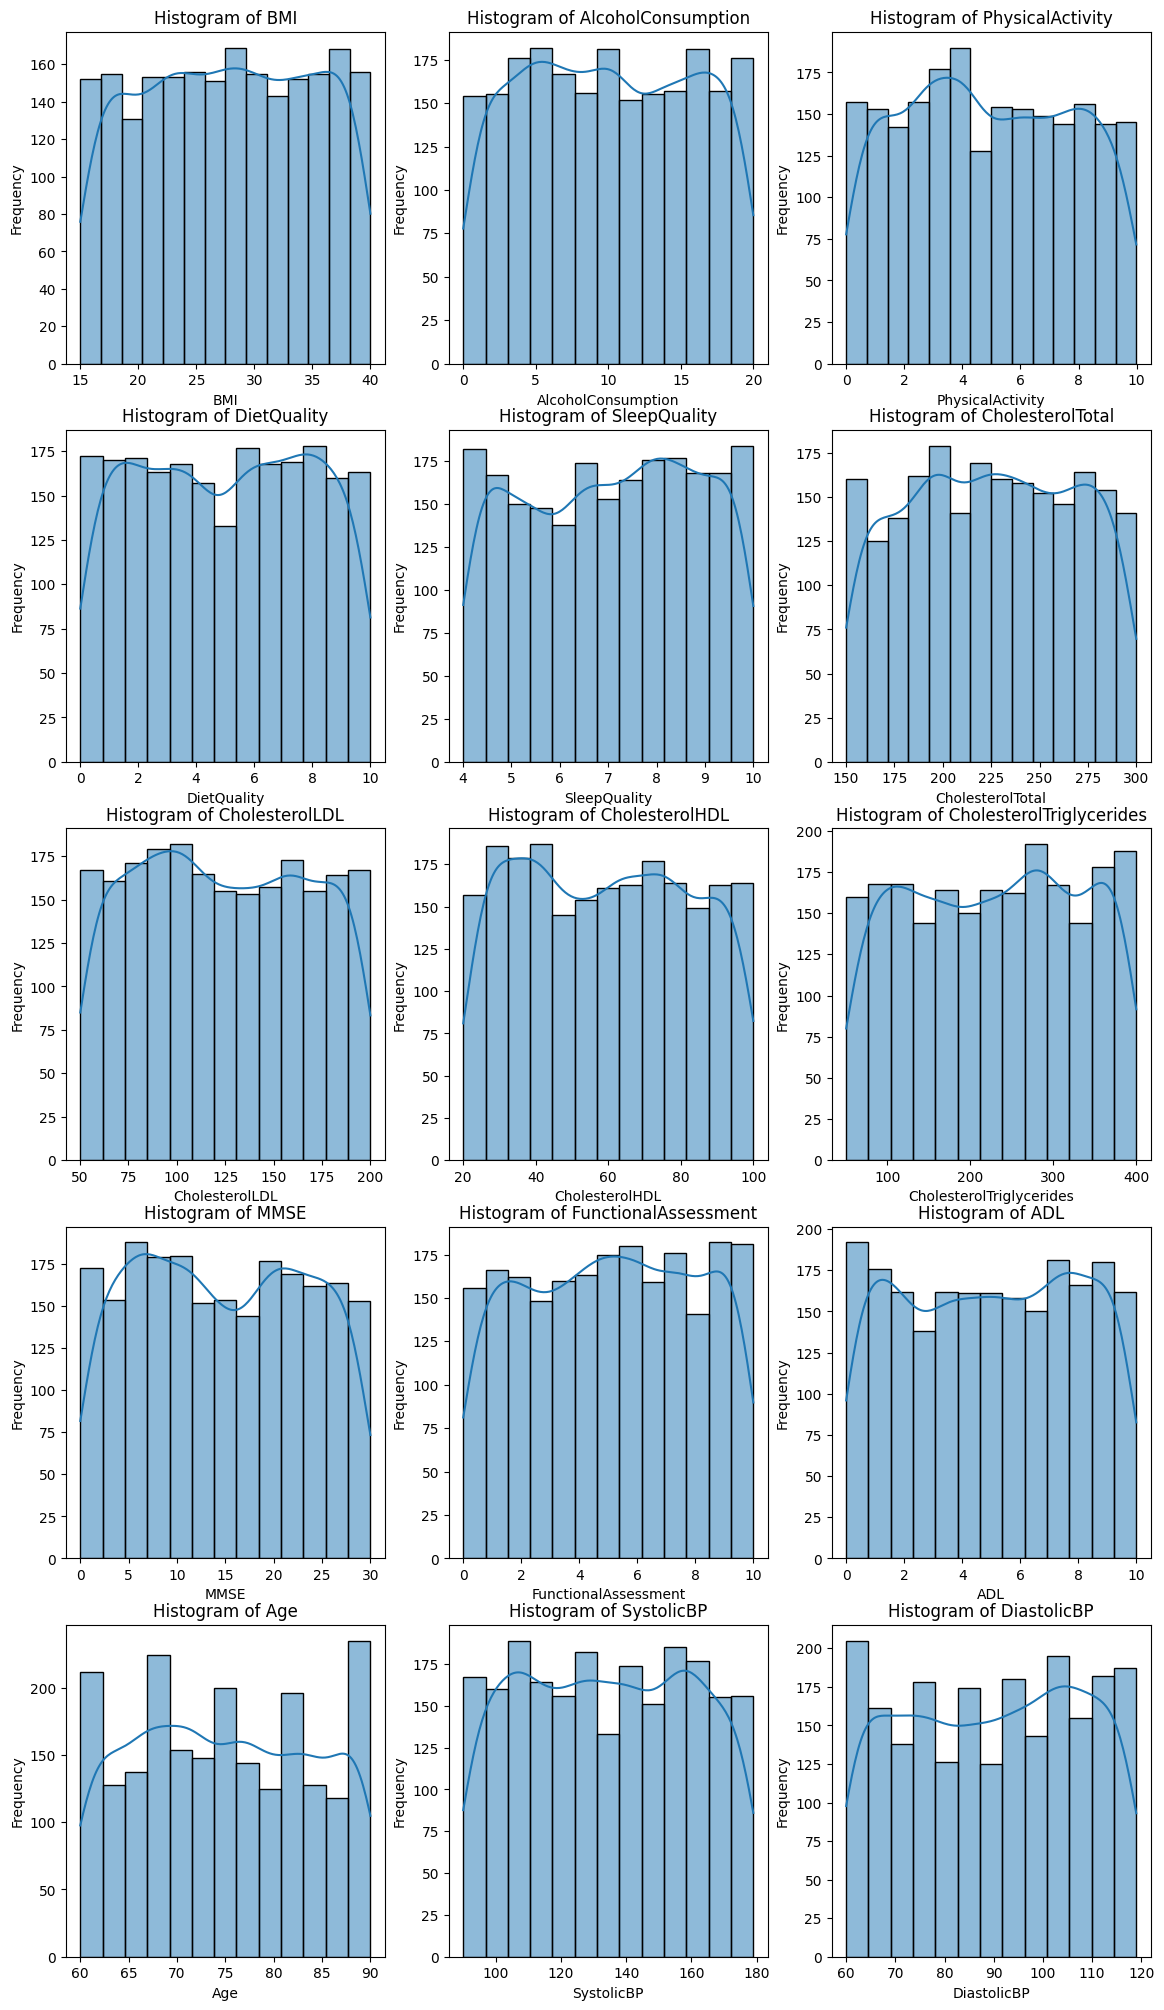

In [10]:
colsToScale= (df.columns[df.dtypes=='float64']).tolist() + ['Age', 'SystolicBP', 'DiastolicBP']
num_cols = len(colsToScale)
num_rows = (num_cols + 1) // 3  # This creates a grid with 3 columns
fig, axes = plt.subplots(num_rows, 3, figsize=(14, num_rows * 5))

axes = axes.flatten()

for i, col in enumerate(colsToScale):
    sns.histplot(df[col], kde=True, ax=axes[i], palette=["#1f77b4", "#ff7f0e"], edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

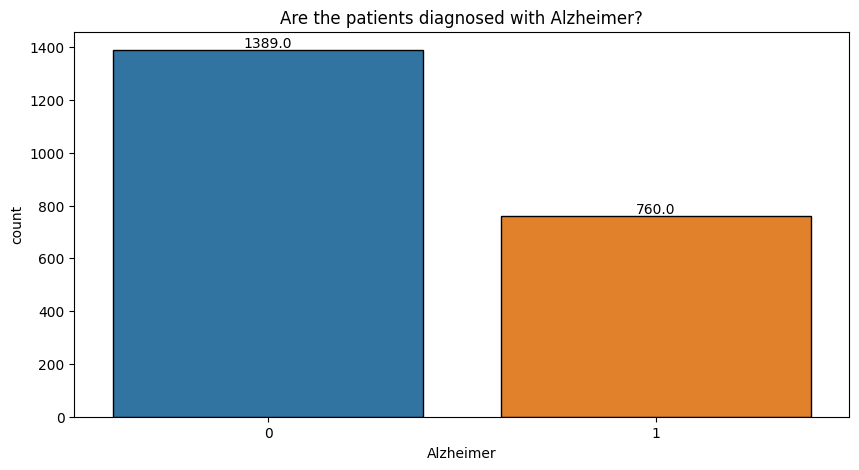

In [11]:
# Plotting the count plot for Diagnosis with the corrected palette usage
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x="Diagnosis", hue="Diagnosis", palette=["#1f77b4", "#ff7f0e"], edgecolor='black', legend=False)
ax.set_xlabel("Alzheimer")
ax.set_title("Are the patients diagnosed with Alzheimer?")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()


Data Procssecing

In [12]:
from sklearn.preprocessing import StandardScaler

# Initializing StandardScaler
scaler_standard = StandardScaler()

# Applying StandardScaler to variables, correcting the error with reshape
df['Age'] = scaler_standard.fit_transform(df['Age'].values.reshape(-1, 1))
df['BMI'] = scaler_standard.fit_transform(df['BMI'].values.reshape(-1, 1))
df['AlcoholConsumption'] = scaler_standard.fit_transform(df['AlcoholConsumption'].values.reshape(-1, 1))
df['PhysicalActivity'] = scaler_standard.fit_transform(df['PhysicalActivity'].values.reshape(-1, 1))
df['DietQuality'] = scaler_standard.fit_transform(df['DietQuality'].values.reshape(-1, 1))
df['SleepQuality'] = scaler_standard.fit_transform(df['SleepQuality'].values.reshape(-1, 1))
df['SystolicBP'] = scaler_standard.fit_transform(df['SystolicBP'].values.reshape(-1, 1))
df['DiastolicBP'] = scaler_standard.fit_transform(df['DiastolicBP'].values.reshape(-1, 1))
df['CholesterolTotal'] = scaler_standard.fit_transform(df['CholesterolTotal'].values.reshape(-1, 1))
df['CholesterolLDL'] = scaler_standard.fit_transform(df['CholesterolLDL'].values.reshape(-1, 1))
df['CholesterolHDL'] = scaler_standard.fit_transform(df['CholesterolHDL'].values.reshape(-1, 1))
df['CholesterolTriglycerides'] = scaler_standard.fit_transform(df['CholesterolTriglycerides'].values.reshape(-1, 1))
df['MMSE'] = scaler_standard.fit_transform(df['MMSE'].values.reshape(-1, 1))
df['FunctionalAssessment'] = scaler_standard.fit_transform(df['FunctionalAssessment'].values.reshape(-1, 1))
df['ADL'] = scaler_standard.fit_transform(df['ADL'].values.reshape(-1, 1))

# Viewing
scaler_standard

StandardScaler()


This code standardizes the numerical variables in the dataset using StandardScaler from sklearn. Standardization ensures that each variable has a mean of 0 and a standard deviation of 1, which helps in the following ways:

Consistency in Scale: Many machine learning models, like logistic regression, SVM, and K-Means, perform better when input features are on the same scale.
Faster Convergence: For gradient-based models, standardization helps speed up training.
Avoiding Bias: Features with large values won’t disproportionately influence the model.
Each variable is reshaped into a 2D format for compatibility with StandardScaler, which then transforms the data to meet these conditions.

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Initializing MinMaxScaler
scaler_minmax = MinMaxScaler()

# Applying MinMaxScaler to variables, correcting the error with reshape
df['Age'] = scaler_minmax.fit_transform(df['Age'].values.reshape(-1, 1))
df['BMI'] = scaler_minmax.fit_transform(df['BMI'].values.reshape(-1, 1))
df['AlcoholConsumption'] = scaler_minmax.fit_transform(df['AlcoholConsumption'].values.reshape(-1, 1))
df['PhysicalActivity'] = scaler_minmax.fit_transform(df['PhysicalActivity'].values.reshape(-1, 1))
df['DietQuality'] = scaler_minmax.fit_transform(df['DietQuality'].values.reshape(-1, 1))
df['SleepQuality'] = scaler_minmax.fit_transform(df['SleepQuality'].values.reshape(-1, 1))
df['SystolicBP'] = scaler_minmax.fit_transform(df['SystolicBP'].values.reshape(-1, 1))
df['DiastolicBP'] = scaler_minmax.fit_transform(df['DiastolicBP'].values.reshape(-1, 1))
df['CholesterolTotal'] = scaler_minmax.fit_transform(df['CholesterolTotal'].values.reshape(-1, 1))
df['CholesterolLDL'] = scaler_minmax.fit_transform(df['CholesterolLDL'].values.reshape(-1, 1))
df['CholesterolHDL'] = scaler_minmax.fit_transform(df['CholesterolHDL'].values.reshape(-1, 1))
df['CholesterolTriglycerides'] = scaler_minmax.fit_transform(df['CholesterolTriglycerides'].values.reshape(-1, 1))
df['MMSE'] = scaler_minmax.fit_transform(df['MMSE'].values.reshape(-1, 1))
df['FunctionalAssessment'] = scaler_minmax.fit_transform(df['FunctionalAssessment'].values.reshape(-1, 1))
df['ADL'] = scaler_minmax.fit_transform(df['ADL'].values.reshape(-1, 1))

# Viewing
scaler_minmax

MinMaxScaler()

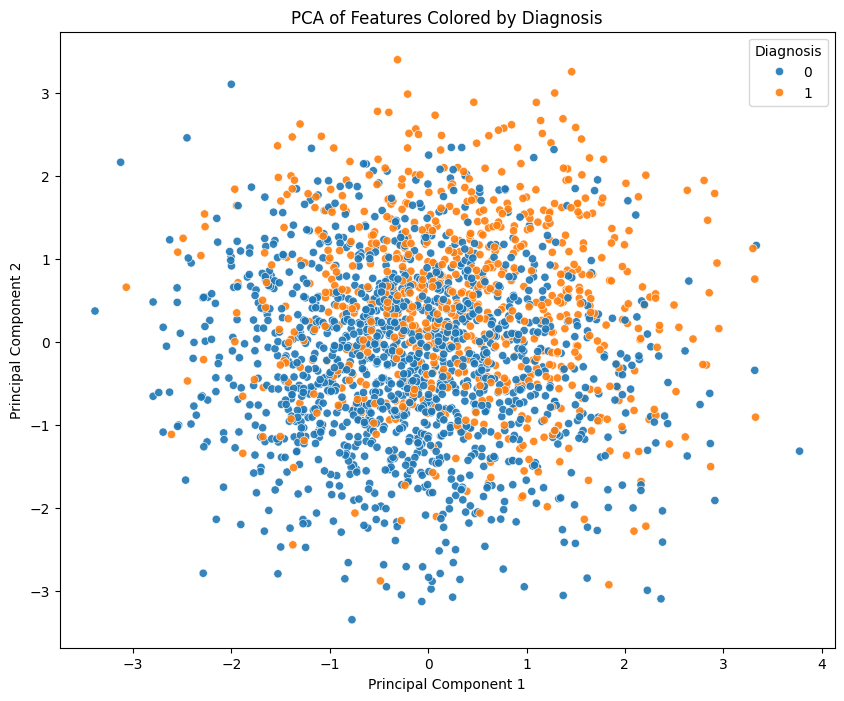

In [14]:
# Importing necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Selecting features and target variable
X = df.drop(columns=['Diagnosis'])  # Features
y = df['Diagnosis']  # Target variable

# Step 2: Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Applying PCA
# Set the number of components to reduce to (e.g., 2 for easy visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Plotting the PCA-transformed data with respect to the target variable
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y,palette=["#1f77b4", "#ff7f0e"], alpha=0.9)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Features Colored by Diagnosis")
plt.legend(title="Diagnosis")
plt.show()


<Figure size 1200x1000 with 0 Axes>

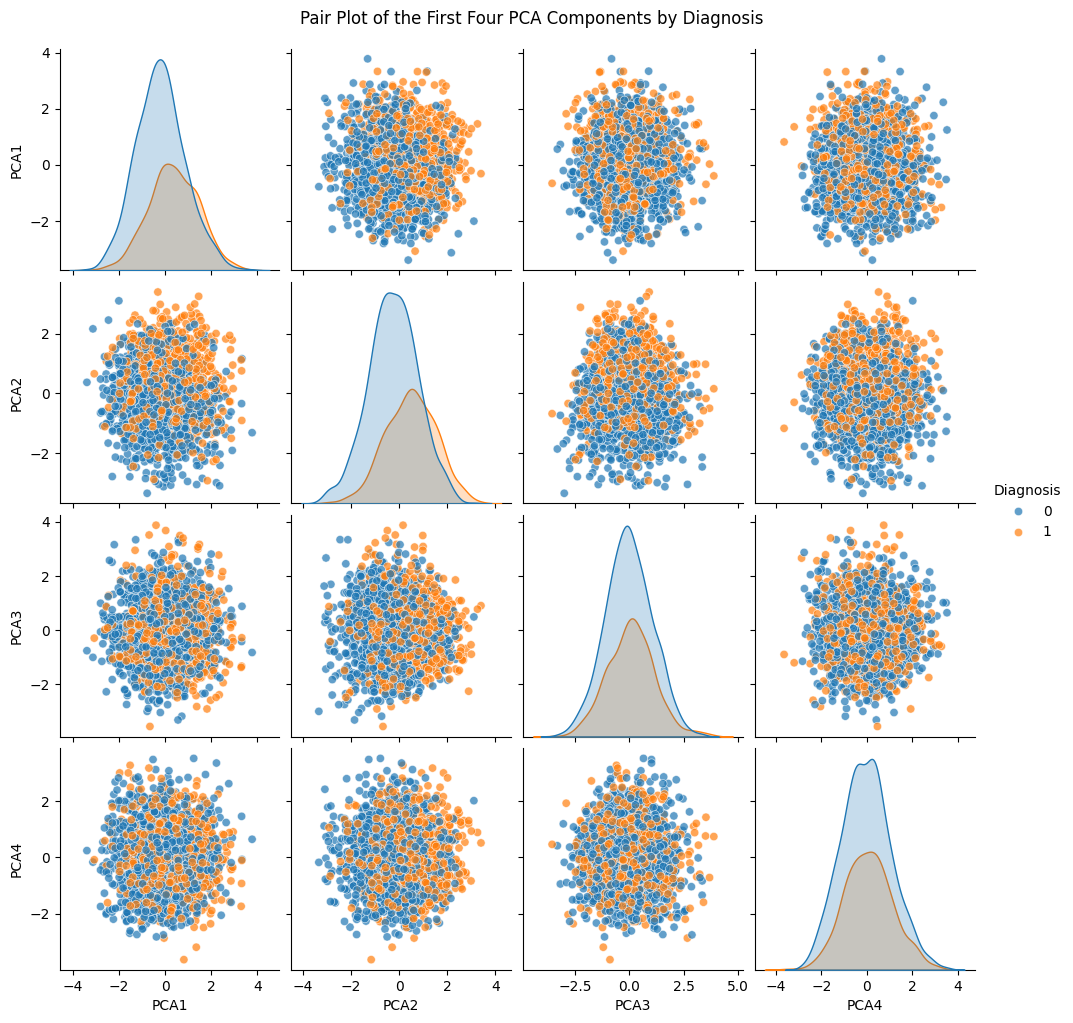

In [15]:
# Importing necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Selecting features and target variable
X = df.drop(columns=['Diagnosis'])  # Features
y = df['Diagnosis']  # Target variable

# Step 2: Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Applying PCA with 4 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Convert the PCA results into a DataFrame for easier plotting
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])
pca_df['Diagnosis'] = y.values  # Add the diagnosis column for color coding

# Step 4: Pair plot of the first four principal components
plt.figure(figsize=(12, 10))
sns.pairplot(pca_df, hue='Diagnosis', palette=["#1f77b4", "#ff7f0e"], plot_kws={'alpha': 0.7})
plt.suptitle("Pair Plot of the First Four PCA Components by Diagnosis", y=1.02)
plt.show()


This code normalizes the numerical variables in the dataset using MinMaxScaler from sklearn.preprocessing. This method scales data to a range, typically 0 to 1.

Why Normalize?

Consistent Scale: It ensures all features are on the same scale, which is helpful for algorithms that use distance calculations (e.g., K-Means or K-Nearest Neighbors).
Preserve Relationships: Unlike standardization, normalization keeps the relative distances between values, preserving the original data distribution.
Better Performance: For models that use gradient descent (like neural networks), normalization can improve training speed and model performance.

In [16]:
columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

#normalize the columns
min_max_scaler = MinMaxScaler()
df[columns] = min_max_scaler.fit_transform(df[columns])

#standardize the columns
standard_scaler = StandardScaler()
df[columns] = standard_scaler.fit_transform(df[columns])


Model Training and Data Splitting

After preparing the data, we split it into training and test sets. This split lets us train the model on one part (usually 80%) and test it on the other (20%) to check how well it performs on new data. For example, in predicting customer churn, we’d separate features like usage history and plan type from the target ("Churn") and then apply the split. This way, we train the model on most of the data while keeping some aside to test its accuracy and avoid overfitting, ensuring it works well on unseen data.

In [17]:
# Split the data into features (X) and target (y)
X = df.drop("Diagnosis", axis=1) # Drop the target column to get the features
y = df["Diagnosis"] # Set the target column
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

# Visualize training data
print("Rows and columns of training data X_train:", X_train.shape)
print("Rows and columns of training data y_train:", X_train.shape)

Rows and columns of training data X_train: (1719, 32)
Rows and columns of training data y_train: (1719, 32)


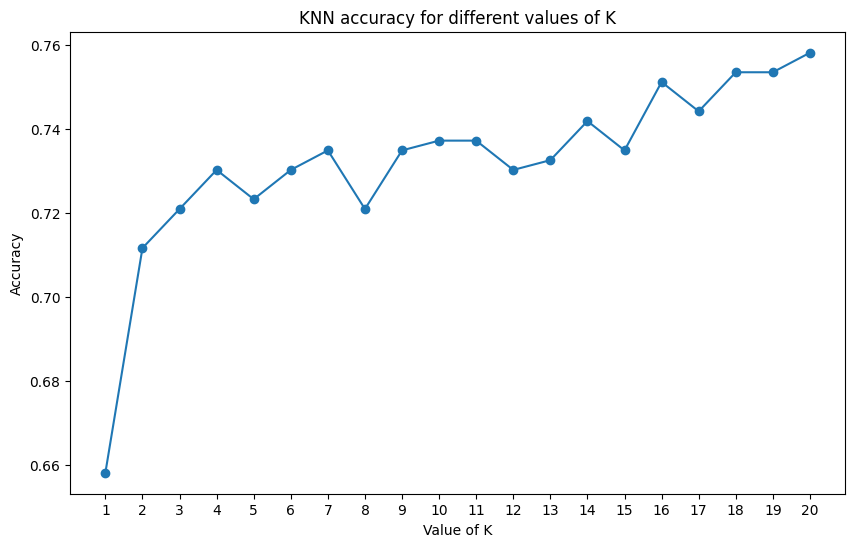

Best value of K: 20
Corresponding accuracy: 0.7581395348837209


In [18]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
    
# Find the ideal value of K
k_values = range(1, 21)
accuracies = []
    
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
 
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()
    
# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

In [19]:
# Calculate precision and recall
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.8356
Recall: 0.3987


In [20]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()  # Unpack values from the confusion matrix

# Calculate Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate Specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.4f}")


Precision: 0.8356
Recall: 0.3987
Specificity: 0.9567


In [21]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
pred_rfc= rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       277
           1       0.96      0.82      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.90      0.92       430
weighted avg       0.93      0.93      0.92       430



In [22]:
#GBoost Classifier

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
pred_gbc= gbc.predict(X_test)
print(classification_report(y_test,pred_gbc))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       277
           1       0.96      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430



In [23]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Defining a list of models to evaluate
models = [
    
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=50)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=13)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),("XGBoost", XGBClassifier(random_state=42)),
]

# Evaluating each model and printing accuracy, precision, recall, and specificity
for name, model in models:
    model.fit(X_train, y_train)
    
    # Training predictions and metrics
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_cm = confusion_matrix(y_train, y_train_pred)
    train_specificity = train_cm[0, 0] / (train_cm[0, 0] + train_cm[0, 1])  # TN / (TN + FP)

    # Testing predictions and metrics
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)
    test_specificity = test_cm[0, 0] / (test_cm[0, 0] + test_cm[0, 1])  # TN / (TN + FP)
    
    print(f"{name} Model:")
    print(f"  - Training Accuracy: {train_accuracy:.2f}")
    print(f"  - Testing Accuracy: {test_accuracy:.2f}")
    print(f"  - Training Precision: {train_precision:.2f}")
    print(f"  - Testing Precision: {test_precision:.2f}")
    print(f"  - Training Recall: {train_recall:.2f}")
    print(f"  - Testing Recall: {test_recall:.2f}")
    print(f"  - Training Specificity: {train_specificity:.2f}")
    print(f"  - Testing Specificity: {test_specificity:.2f}")
    print("-" * 30)


Decision Tree Model:
  - Training Accuracy: 1.00
  - Testing Accuracy: 0.91
  - Training Precision: 1.00
  - Testing Precision: 0.89
  - Training Recall: 1.00
  - Testing Recall: 0.84
  - Training Specificity: 1.00
  - Testing Specificity: 0.94
------------------------------
Random Forest Model:
  - Training Accuracy: 1.00
  - Testing Accuracy: 0.93
  - Training Precision: 1.00
  - Testing Precision: 0.96
  - Training Recall: 1.00
  - Testing Recall: 0.82
  - Training Specificity: 1.00
  - Testing Specificity: 0.98
------------------------------
Logistic Regression Model:
  - Training Accuracy: 0.85
  - Testing Accuracy: 0.83
  - Training Precision: 0.81
  - Testing Precision: 0.79
  - Training Recall: 0.75
  - Testing Recall: 0.71
  - Training Specificity: 0.91
  - Testing Specificity: 0.90
------------------------------
K-Nearest Neighbors Model:
  - Training Accuracy: 0.81
  - Testing Accuracy: 0.73
  - Training Precision: 0.85
  - Testing Precision: 0.72
  - Training Recall: 0.57
 

In [24]:
# Let's calculate and display the requested metrics (accuracy, precision, recall, and specificity)
# for both before and after applying PCA on the Gradient Boosting model

from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Step 1: Train and evaluate Gradient Boosting model without PCA
gboost = GradientBoostingClassifier(random_state=42)
gboost.fit(X_train, y_train)

# Predict on the test data (without PCA)
y_test_pred_no_pca = gboost.predict(X_test)

# Metrics before applying PCA
accuracy_no_pca = accuracy_score(y_test, y_test_pred_no_pca)
precision_no_pca = precision_score(y_test, y_test_pred_no_pca)
recall_no_pca = recall_score(y_test, y_test_pred_no_pca)
cm_no_pca = confusion_matrix(y_test, y_test_pred_no_pca)
specificity_no_pca = cm_no_pca[0, 0] / (cm_no_pca[0, 0] + cm_no_pca[0, 1])

# Step 2: Apply PCA and reduce to 4 components
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 3: Train and evaluate Gradient Boosting model after PCA
gboost_pca = GradientBoostingClassifier(random_state=42)
gboost_pca.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_test_pred_pca = gboost_pca.predict(X_test_pca)

# Metrics after applying PCA
accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
precision_pca = precision_score(y_test, y_test_pred_pca)
recall_pca = recall_score(y_test, y_test_pred_pca)
cm_pca = confusion_matrix(y_test, y_test_pred_pca)
specificity_pca = cm_pca[0, 0] / (cm_pca[0, 0] + cm_pca[0, 1])

# Compiling results into a dictionary
results = {
    "Without PCA": {
        "Accuracy": accuracy_no_pca,
        "Precision": precision_no_pca,
        "Recall": recall_no_pca,
        "Specificity": specificity_no_pca
    },
    "With PCA": {
        "Accuracy": accuracy_pca,
        "Precision": precision_pca,
        "Recall": recall_pca,
        "Specificity": specificity_pca
    }
}

import pandas as pd
# Displaying results in a table for easy comparison
results_df = pd.DataFrame(results)
print("Gradient Boosting Results - PCA vs. No PCA")
print(results_df)


Gradient Boosting Results - PCA vs. No PCA
             Without PCA  With PCA
Accuracy        0.958140  0.734884
Precision       0.959184  0.709677
Recall          0.921569  0.431373
Specificity     0.978339  0.902527


In [25]:
# Let's calculate the same metrics (accuracy, precision, recall, specificity) for multiple models (Decision Tree, Random Forest, XGBoost, and Gradient Boosting)
# before and after applying PCA for comparison.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Define models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Initialize a dictionary to store results
results_before_after_pca = {"Model": [], "Accuracy Without PCA": [], "Precision Without PCA": [], "Recall Without PCA": [], "Specificity Without PCA": [],
                            "Accuracy With PCA": [], "Precision With PCA": [], "Recall With PCA": [], "Specificity With PCA": []}

# Apply PCA with a reduced number of components
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Loop through each model, calculate metrics before and after PCA
for model_name, model in models.items():
    # Train and evaluate the model without PCA
    model.fit(X_train, y_train)
    y_test_pred_no_pca = model.predict(X_test)
    
  # Metrics without PCA
    accuracy_no_pca = round(accuracy_score(y_test, y_test_pred_no_pca), 3)
    precision_no_pca = round(precision_score(y_test, y_test_pred_no_pca), 3)
    recall_no_pca = round(recall_score(y_test, y_test_pred_no_pca), 3)
    cm_no_pca = confusion_matrix(y_test, y_test_pred_no_pca)
    specificity_no_pca = round(cm_no_pca[0, 0] / (cm_no_pca[0, 0] + cm_no_pca[0, 1]), 3)
    
    # Train and evaluate the model with PCA
    model.fit(X_train_pca, y_train)
    y_test_pred_pca = model.predict(X_test_pca)
    
    # Metrics with PCA
    accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
    precision_pca = precision_score(y_test, y_test_pred_pca)
    recall_pca = recall_score(y_test, y_test_pred_pca)
    cm_pca = confusion_matrix(y_test, y_test_pred_pca)
    specificity_pca = cm_pca[0, 0] / (cm_pca[0, 0] + cm_pca[0, 1])
    
    # Append results
    results_before_after_pca["Model"].append(model_name)
    results_before_after_pca["Accuracy Without PCA"].append(accuracy_no_pca)
    results_before_after_pca["Precision Without PCA"].append(precision_no_pca)
    results_before_after_pca["Recall Without PCA"].append(recall_no_pca)
    results_before_after_pca["Specificity Without PCA"].append(specificity_no_pca)
    results_before_after_pca["Accuracy With PCA"].append(accuracy_pca)
    results_before_after_pca["Precision With PCA"].append(precision_pca)
    results_before_after_pca["Recall With PCA"].append(recall_pca)
    results_before_after_pca["Specificity With PCA"].append(specificity_pca)

# Convert results to DataFrame
results_df_all_models = pd.DataFrame(results_before_after_pca)
print("Model Performance - PCA vs. No PCA")
print(results_df_all_models)


Model Performance - PCA vs. No PCA
               Model  Accuracy Without PCA  Precision Without PCA  \
0      Decision Tree                 0.907                  0.890   
1      Random Forest                 0.926                  0.962   
2            XGBoost                 0.949                  0.958   
3  Gradient Boosting                 0.958                  0.959   

   Recall Without PCA  Specificity Without PCA  Accuracy With PCA  \
0               0.843                    0.942           0.606977   
1               0.824                    0.982           0.716279   
2               0.895                    0.978           0.676744   
3               0.922                    0.978           0.734884   

   Precision With PCA  Recall With PCA  Specificity With PCA  
0            0.442029         0.398693              0.722022  
1            0.659794         0.418301              0.880866  
2            0.560345         0.424837              0.815884  
3            0.709677

In [27]:
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Identify important features (non-zero coefficients)
important_features = X_train.columns[model.coef_[0] != 0]
print("Important Features:", important_features)


Important Features: Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL',
       'Confusion', 'PersonalityChanges', 'Forgetfulness'],
      dtype='object')


Important Features and Coefficients:
                     Feature  Coefficient
23          MemoryComplaints     2.602529
24        BehavioralProblems     2.327414
22      FunctionalAssessment    -1.332280
25                       ADL    -1.266385
21                      MMSE    -0.856913
14                HeadInjury    -0.276543
5                    Smoking    -0.225581
13                Depression     0.165471
12                  Diabetes     0.155274
26                 Confusion    -0.146447
3             EducationLevel    -0.144490
19            CholesterolHDL     0.117253
15              Hypertension     0.117155
0                        Age    -0.109612
1                     Gender     0.093058
10   FamilyHistoryAlzheimers    -0.089709
17               DiastolicBP     0.089279
9               SleepQuality    -0.086523
20  CholesterolTriglycerides     0.085971
7           PhysicalActivity    -0.085359
8                DietQuality     0.066016
28             Forgetfulness     0.0630

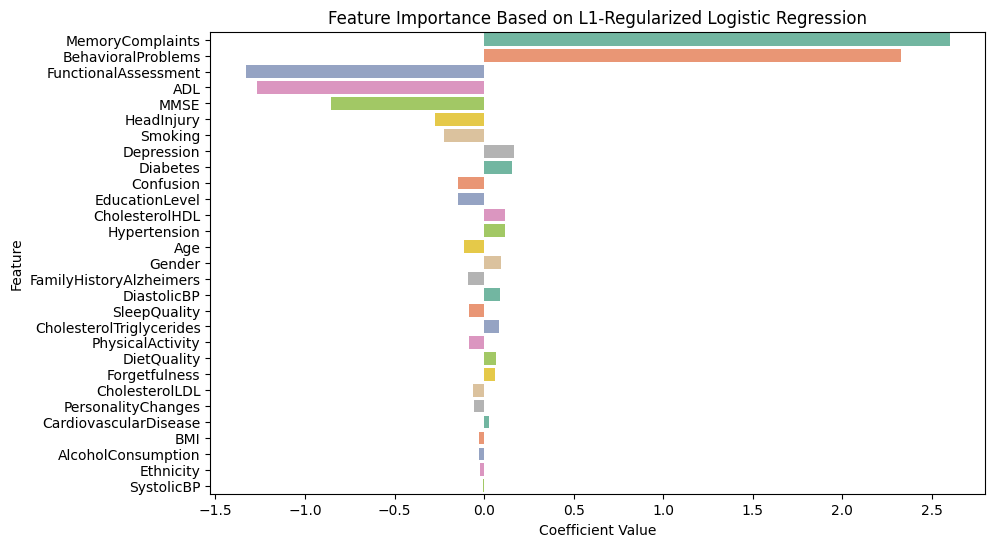

In [28]:
# Logistic Regression Feature importance 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Fit Logistic Regression model with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Identify important features (non-zero coefficients) and their coefficients
non_zero_coef = model.coef_[0] != 0  # Boolean mask for non-zero coefficients
important_features = X_train.columns[non_zero_coef]
important_coefficients = model.coef_[0][non_zero_coef]

# Create DataFrame for viewing and sorting
feature_importance_df = pd.DataFrame({'Feature': important_features, 'Coefficient': important_coefficients})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Print the important features and coefficients
print("Important Features and Coefficients:")
print(feature_importance_df)

# Plotting the important features
plt.style.use("default")
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df, palette='Set2')
plt.title("Feature Importance Based on L1-Regularized Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(False)
plt.show()


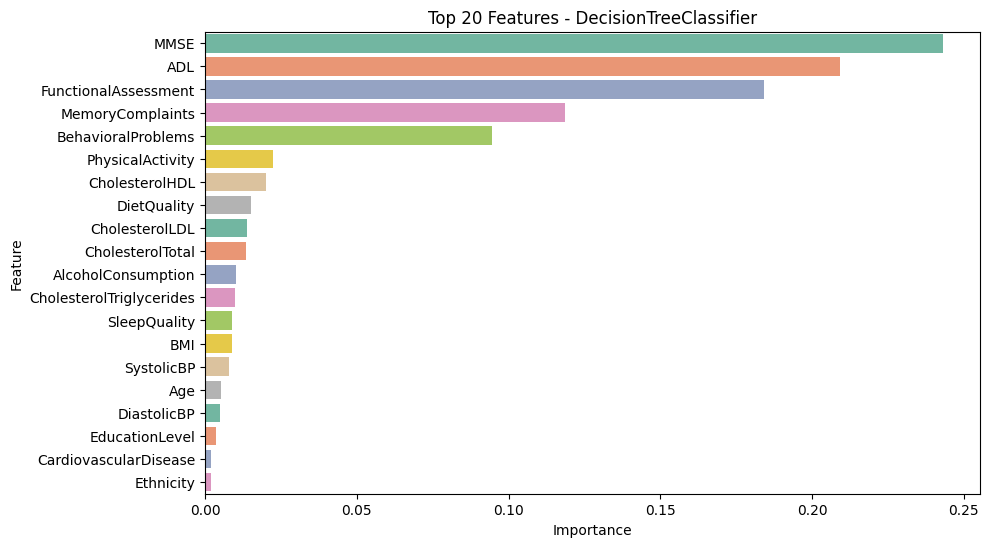

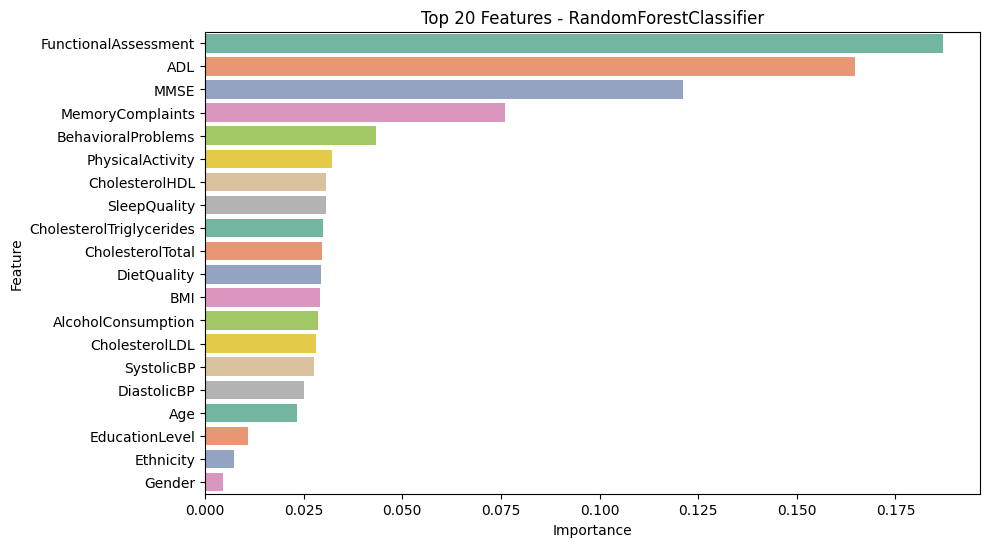

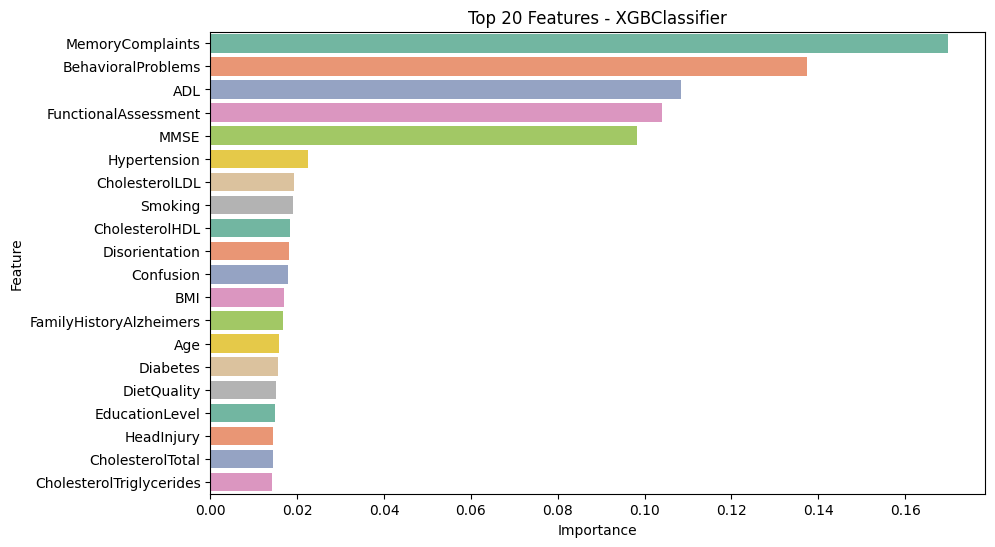

[LightGBM] [Info] Number of positive: 607, number of negative: 1112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3282
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353112 -> initscore=-0.605387
[LightGBM] [Info] Start training from score -0.605387


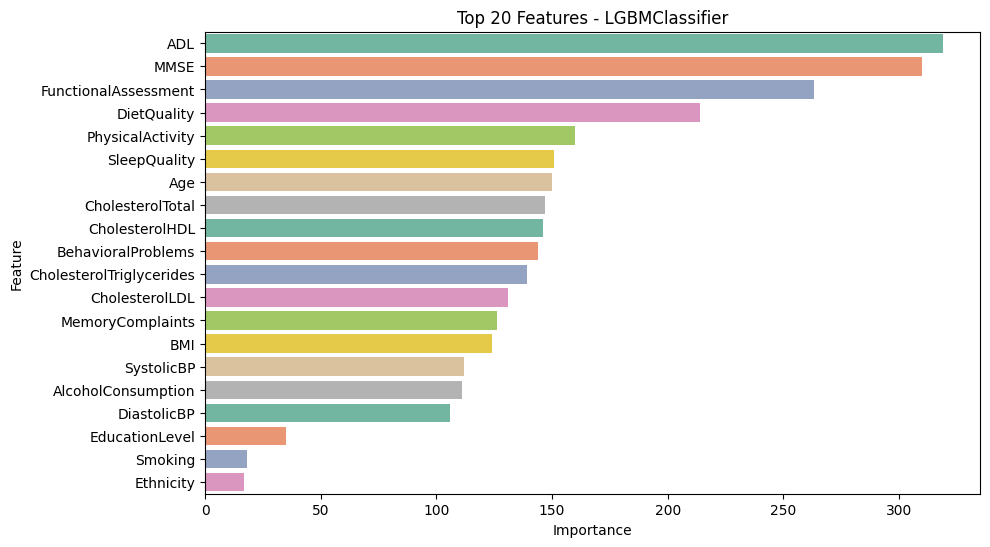

The four most important features across all models are:
ADL (appears 4 times)
FunctionalAssessment (appears 4 times)
MMSE (appears 3 times)
MemoryComplaints (appears 3 times)


In [29]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from collections import Counter

# List of models that support feature importances
models_with_feature_importances = [("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
                                   ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
                                   ("XGBClassifier", XGBClassifier(random_state=42)),
                                   ("LGBMClassifier", LGBMClassifier(random_state=42))]

# Dictionary to collect feature importances across models
feature_importance_all_models = []

# Iterate over models
for model_name, model in models_with_feature_importances:
    # Train model
    model.fit(X_train, y_train)
    
    # Get importance of features
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    else:
        print(f"{model_name} does not support feature importances.")
        continue
    
    # Create DataFrame for easier viewing
    feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 
                                           'Importance': feature_importances})
    
    # Sort by importance and get the top features
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
    top_features = feature_importances_df.head(4)  # Get the top 4 features for each model
    feature_importance_all_models.extend(top_features['Feature'].tolist())

    # Plot the top 20 features for each model
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:20], palette='Set2')
    plt.title(f"Top 20 Features - {model_name}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(False)
    plt.show()

# Count occurrences of each feature in the top 4 lists across models
feature_counts = Counter(feature_importance_all_models)
most_common_features = feature_counts.most_common(4)  # Find the 4 most common important features

# Display the four most important features across models
print("The four most important features across all models are:")
for feature, count in most_common_features:
    print(f"{feature} (appears {count} times)")


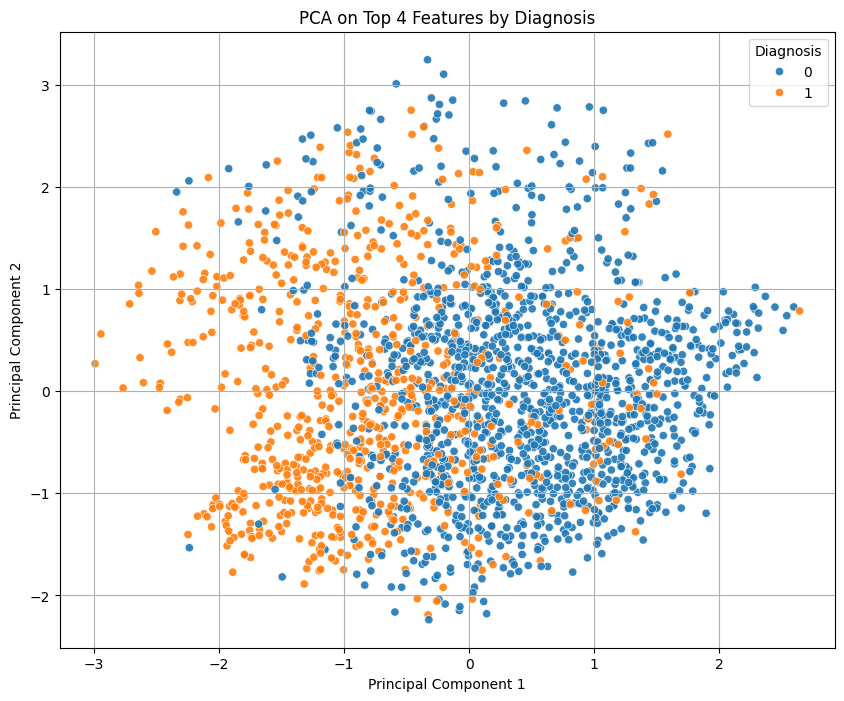

In [30]:
# Specify the four most important features based on feature importance analysis
top_features = ["ADL", "FunctionalAssessment", "MMSE", "MemoryComplaints"]

# Step 1: Extract the top 4 features and the target variable
X_top_features = df[top_features]  # Features
y = df['Diagnosis']  # Target variable

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top_features)

# Step 3: Apply PCA to reduce to two components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert the PCA results to a DataFrame for easier plotting
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Diagnosis'] = y.values  # Add the diagnosis column for color coding

# Step 4: Plot the PCA components with respect to Diagnosis
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Diagnosis', palette=["#1f77b4", "#ff7f0e"], alpha=0.9)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Top 4 Features by Diagnosis")
plt.legend(title="Diagnosis")
plt.grid(True)
plt.show()


In [31]:
# Import necessary libraries for model evaluation and performance metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Models to train and test
models = [
        ("LogisticRegression", LogisticRegression(random_state=42, max_iter=1000)),
    ("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
    ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("XGBClassifier", XGBClassifier(random_state=42)),
]

# Split the PCA-transformed data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Initialize a dictionary to store results
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "Specificity": []}

# Train and evaluate each model
for name, model in models:
    model.fit(X_train_pca, y_train)
    y_test_pred = model.predict(X_test_pca)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    cm = confusion_matrix(y_test, y_test_pred)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0  # Specificity calculation
    
    # Append results to dictionary
    results["Model"].append(name)
    results["Accuracy"].append(round(accuracy, 3))
    results["Precision"].append(round(precision, 3))
    results["Recall"].append(round(recall, 3))
    results["Specificity"].append(round(specificity, 3))

# Convert results to a DataFrame for display
results_df = pd.DataFrame(results)

# Display the results
print("Model Performance After PCA with Top 4 Features")
print(results_df)


Model Performance After PCA with Top 4 Features
                    Model  Accuracy  Precision  Recall  Specificity
0      LogisticRegression     0.781      0.764   0.611        0.885
1  DecisionTreeClassifier     0.750      0.680   0.643        0.815
2  RandomForestClassifier     0.795      0.786   0.631        0.895
3           XGBClassifier     0.777      0.763   0.594        0.888


In [32]:
# Import necessary libraries for model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Specify the four most important features based on feature importance analysis
top_features = ["ADL", "FunctionalAssessment", "MMSE", "MemoryComplaints"]
X_top_features = df[top_features]  # Extract only the top features
y = df['Diagnosis']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top_features)

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define models to evaluate
models = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=1000)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42))
]

# Initialize a dictionary to store results for each model
results = {
    "Model": [], "Training Accuracy": [], "Testing Accuracy": [], "Precision": [], "Recall": [], "Specificity": []
}

# Train and evaluate each model
for name, model in models:
    # Train model
    model.fit(X_train, y_train)
    
    # Training and testing predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Confusion matrix for test set
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0

    # Append results to dictionary
    results["Model"].append(name)
    results["Training Accuracy"].append(round(train_accuracy, 3))
    results["Testing Accuracy"].append(round(test_accuracy, 3))
    results["Precision"].append(round(precision, 3))
    results["Recall"].append(round(recall, 3))
    results["Specificity"].append(round(specificity, 3))

    # Display confusion matrix
    print(f"Confusion Matrix for {name}:")
    print(cm)
    print("-" * 40)

# Convert results to DataFrame for display
results_df = pd.DataFrame(results)

# Print results
print("Model Performance on Top Features")
print(results_df)


Confusion Matrix for Logistic Regression:
[[352  49]
 [ 91 153]]
----------------------------------------
Confusion Matrix for Decision Tree:
[[345  56]
 [ 73 171]]
----------------------------------------
Confusion Matrix for Random Forest:
[[390  11]
 [ 65 179]]
----------------------------------------
Confusion Matrix for XGBoost:
[[373  28]
 [ 62 182]]
----------------------------------------
Confusion Matrix for Gradient Boosting:
[[390  11]
 [ 61 183]]
----------------------------------------
Model Performance on Top Features
                 Model  Training Accuracy  Testing Accuracy  Precision  \
0  Logistic Regression              0.824             0.783      0.757   
1        Decision Tree              1.000             0.800      0.753   
2        Random Forest              0.999             0.882      0.942   
3              XGBoost              0.997             0.860      0.867   
4    Gradient Boosting              0.929             0.888      0.943   

   Recall  Specif

In [33]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import pandas as pd

# Defining a list of models to evaluate
models = [
    ("XGBClassifier", XGBClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=50)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
]

# Initialize a list to store the results
results = []

# Evaluating each model for overfitting by comparing training and testing performance
for name, model in models:
    model.fit(X_train, y_train)
    
    # Training metrics
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    
    # Testing metrics
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    
    # Calculate gaps between training and testing accuracy to assess overfitting
    accuracy_gap = train_accuracy - test_accuracy
    precision_gap = train_precision - test_precision
    recall_gap = train_recall - test_recall
    
    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Precision": train_precision,
        "Test Precision": test_precision,
        "Train Recall": train_recall,
        "Test Recall": test_recall,
       
    })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)
results_df


Model  Train Accuracy  Test Accuracy  Train Precision  \
0        XGBClassifier        0.996676       0.860465         1.000000   
1        Decision Tree        1.000000       0.800000         1.000000   
2        Random Forest        0.999335       0.882171         1.000000   
3  Logistic Regression        0.824468       0.782946         0.769231   
4    Gradient Boosting        0.928856       0.888372         0.961625   

   Test Precision  Train Recall  Test Recall  
0        0.866667      0.990310     0.745902  
1        0.753304      1.000000     0.700820  
2        0.942105      0.998062     0.733607  
3        0.757426      0.697674     0.627049  
4        0.943299      0.825581     0.750000

In [34]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error

# Initialize a list to store the MSE results
mse_results = []

# Calculate MSE for each model
for name, model in models:
    model.fit(X_train, y_train)
    
    # Calculate MSE on the training set
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    
    # Calculate MSE on the testing set
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Store the MSE results
    mse_results.append({
        "Model": name,
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "MSE Gap": train_mse - test_mse  # MSE difference between training and testing
    })

# Convert results to a DataFrame for easy viewing
mse_results_df = pd.DataFrame(mse_results)
mse_results_df


Model  Train MSE  Test MSE   MSE Gap
0        XGBClassifier   0.003324  0.139535 -0.136210
1        Decision Tree   0.000000  0.200000 -0.200000
2        Random Forest   0.000665  0.117829 -0.117165
3  Logistic Regression   0.175532  0.217054 -0.041522
4    Gradient Boosting   0.071144  0.111628 -0.040484

In [35]:
# Importing necessary libraries
from sklearn.metrics import roc_auc_score

# Initialize a list to store the ROC AUC results for each model
roc_auc_results = []

# Calculating ROC AUC score for each model
for name, model in models:
    model.fit(X_train, y_train)
    
    # Predict probabilities for the positive class
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_test_proba)
    
    # Store the ROC AUC score
    roc_auc_results.append({
        "Model": name,
        "ROC AUC Score": roc_auc
    })

# Convert results to a DataFrame for easy viewing
roc_auc_results_df = pd.DataFrame(roc_auc_results)
roc_auc_results_df


Model  ROC AUC Score
0        XGBClassifier       0.879042
1        Decision Tree       0.780584
2        Random Forest       0.887270
3  Logistic Regression       0.841717
4    Gradient Boosting       0.902350

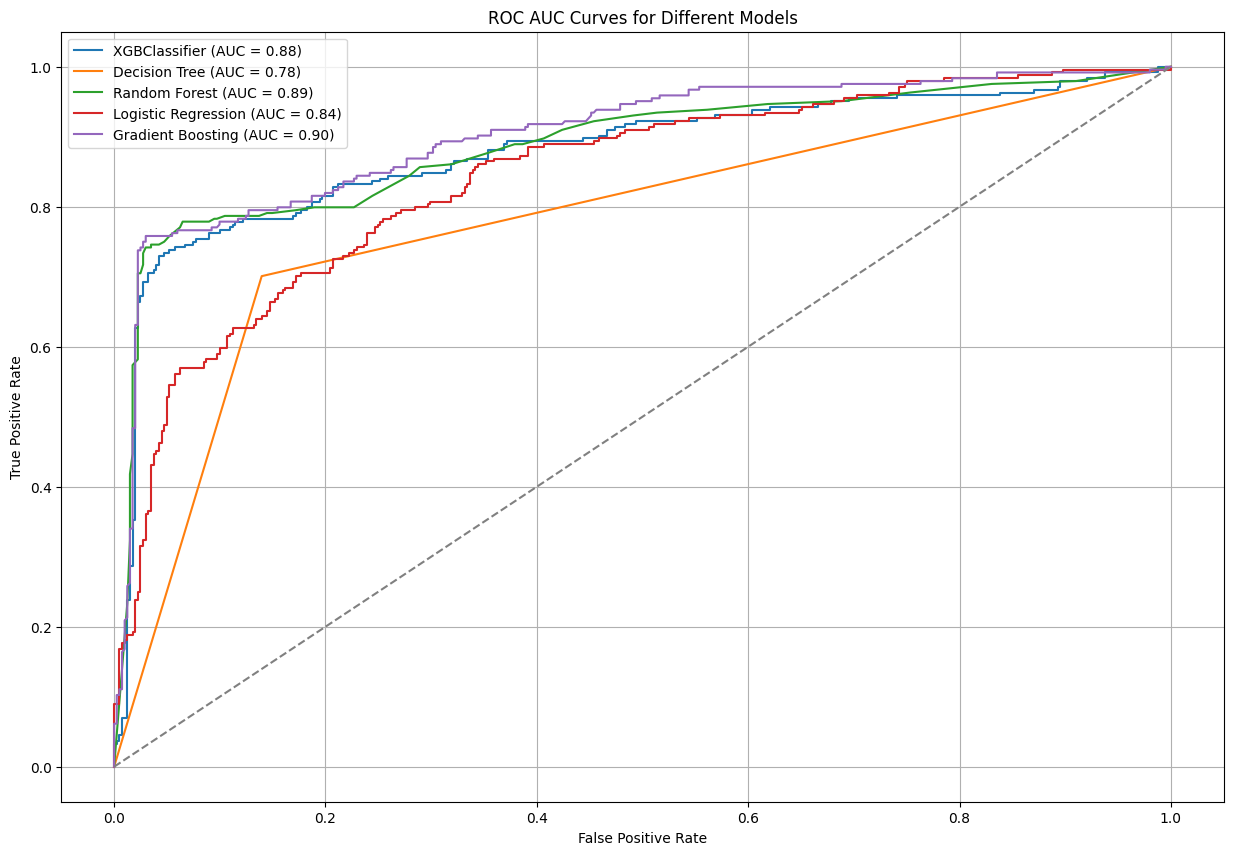

In [36]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Initialize a plot for ROC curves
plt.figure(figsize=(15, 10))

# Plot ROC AUC curves for each model
for name, model in models:
    model.fit(X_train, y_train)
    
    # Get predicted probabilities for the positive class
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    # Calculate ROC curve values
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)  # Calculate AUC for the ROC curve
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    
# Plot formatting
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line for random guessing
plt.title("ROC AUC Curves for Different Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid()
plt.show()


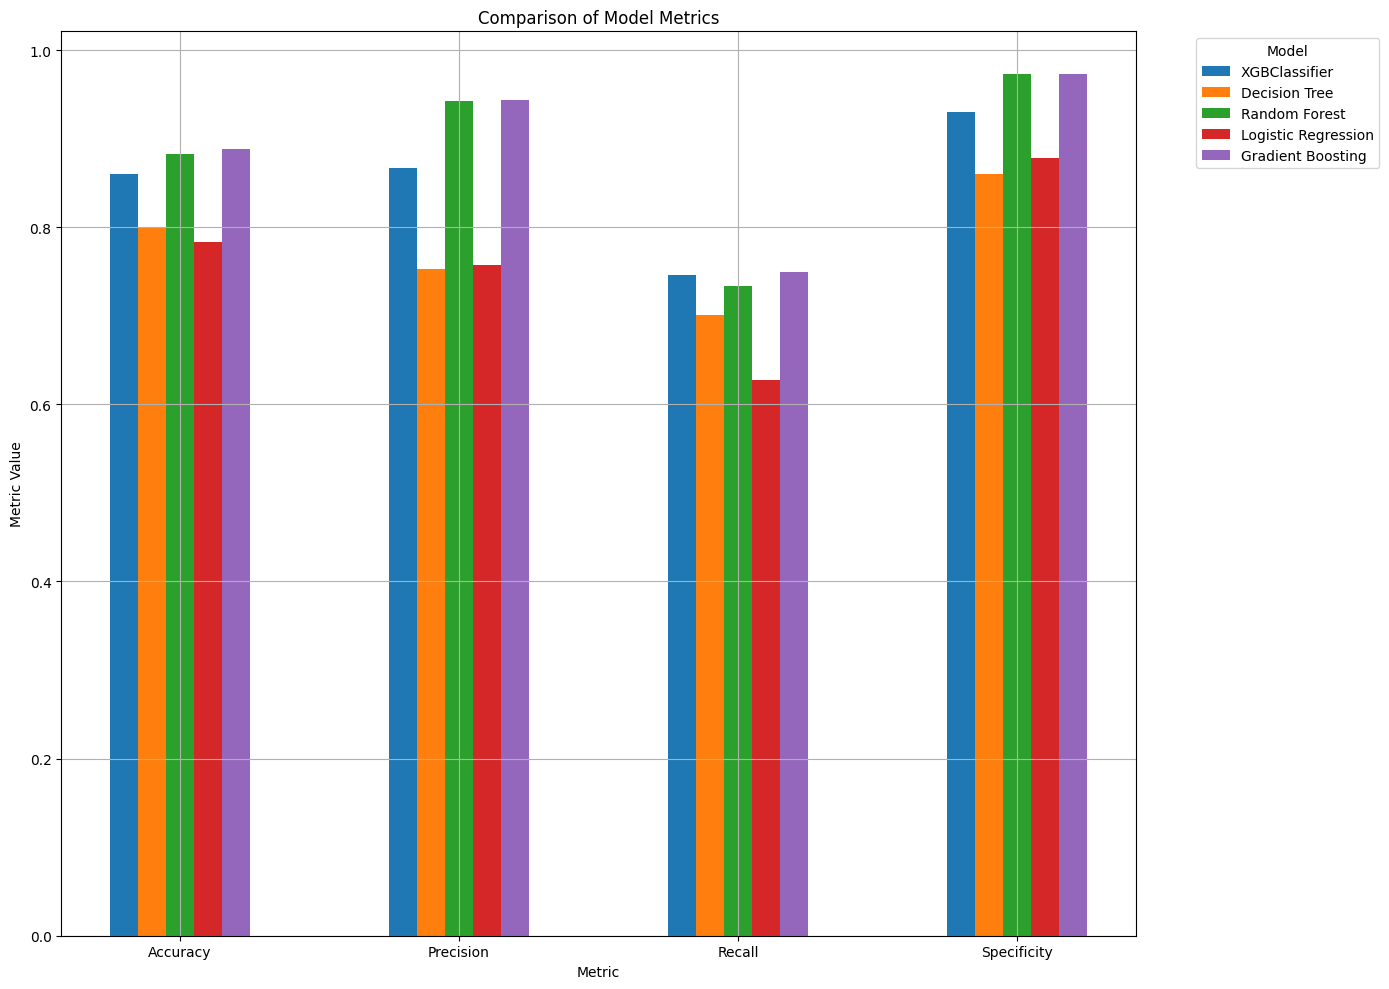

In [37]:


# Initialize lists to store each metric for each model
model_names = []
accuracies = []
precisions = []
recalls = []
specificities = []

# Collect metrics for each model
for name, model in models:
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Extract TP, TN, FP, FN from the confusion matrix
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Specificity calculation with division safety

    # Append results
    model_names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    specificities.append(specificity)

# Define the metrics and their values for each model
metrics = ["Accuracy", "Precision", "Recall", "Specificity"]
metric_values = [accuracies, precisions, recalls, specificities]

# Plotting all metrics as a grouped vertical bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Number of metrics and width of each bar
x = np.arange(len(metrics))
bar_width = 0.1

# Create bars for each model
for i, (model, values) in enumerate(zip(model_names, zip(*metric_values))):
    ax.bar(x + i * bar_width, values, width=bar_width, label=model)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metric')
ax.set_title('Comparison of Model Metrics')
ax.set_xticks(x + bar_width * (len(model_names) - 1) / 2)  # Center the xticks
ax.set_xticklabels(metrics)
ax.set_ylabel("Metric Value")
ax.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
from sklearn.metrics import roc_auc_score
import pandas as pd

# Initialize a list to store the ROC AUC results for training and testing sets for each model
overfitting_results = []

# Calculate ROC AUC scores for both training and testing sets for each model
for name, model in models:
    model.fit(X_train, y_train)
    
    # Training ROC AUC
    y_train_proba = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_train)
    train_roc_auc = roc_auc_score(y_train, y_train_proba)
    
    # Testing ROC AUC
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    test_roc_auc = roc_auc_score(y_test, y_test_proba)
    
    # Calculate the ROC AUC gap
    roc_auc_gap = train_roc_auc - test_roc_auc
    
    # Store the results
    overfitting_results.append({
        "Model": name,
        "Train ROC AUC": train_roc_auc,
        "Test ROC AUC": test_roc_auc,
        "ROC AUC Gap": roc_auc_gap
    })

# Convert to a DataFrame and sort by the ROC AUC Gap
overfitting_results_df = pd.DataFrame(overfitting_results).sort_values(by="ROC AUC Gap", ascending=False)

# Display the DataFrame
print(overfitting_results_df)


                 Model  Train ROC AUC  Test ROC AUC  ROC AUC Gap
1        Decision Tree       1.000000      0.780584     0.219416
0        XGBClassifier       1.000000      0.879042     0.120958
2        Random Forest       1.000000      0.887270     0.112730
4    Gradient Boosting       0.977015      0.902350     0.074665
3  Logistic Regression       0.881859      0.841717     0.040142


In [39]:
# Combine results into a single DataFrame for plotting
results_df = pd.DataFrame(results_full + results_top)

# Define the metrics for plotting
metrics = ["Accuracy", "Precision", "Recall", "Specificity"]

# Plotting all metrics in a single grouped bar chart
plt.figure(figsize=(14, 8))

# Set the width for each bar and the number of models
bar_width = 0.35
num_models = len(models)
x = np.arange(num_models)  # Label locations for models

# Plot bars for each metric
for i, metric in enumerate(metrics):
    # Offset each metric group within the x-axis range for models
    plt.bar(x + i * bar_width / len(metrics) - bar_width / 2, 
            results_df[results_df['Dataset'] == 'Full'][metric], 
            width=bar_width / len(metrics), label=f'Full - {metric}')
    
    plt.bar(x + i * bar_width / len(metrics) - bar_width / 2, 
            results_df[results_df['Dataset'] == 'Top 4 Features'][metric], 
            width=bar_width / len(metrics), label=f'Top 4 - {metric}')

# Setting labels and title
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.title('Comparison of Model Metrics for Full Dataset vs. Top 4 Features')
plt.xticks(x, [name for name, _ in models], rotation=45)
plt.legend(title="Metric & Dataset", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'results_full' is not defined

In [ ]:
#cross validation for each model
from sklearn.model_selection import cross_val_score
import pandas as pd

# Number of cross-validation folds
k = 5

# List to store cross-validation results
cv_results = []

# Perform cross-validation for each model
for name, model in models:
    # Cross-validation scores (using accuracy, but this can be ROC AUC or other metrics as needed)
    cv_scores = cross_val_score(model, X_train, y_train, cv=k, scoring='accuracy')
    
    # Calculate mean and standard deviation of the cross-validation scores
    mean_score = cv_scores.mean()
    std_dev = cv_scores.std()
    
    # Store the results
    cv_results.append({
        "Model": name,
        "CV Mean Accuracy": mean_score,
        "CV Std Dev": std_dev
    })

# Convert results to a DataFrame for easy comparison
cv_results_df = pd.DataFrame(cv_results).sort_values(by="CV Mean Accuracy", ascending=False)
print(cv_results_df)


In [ ]:
# Importing necessary libraries for model evaluation and plotting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import seaborn as sns

# Define the four most important features
top_features = ["ADL", "FunctionalAssessment", "MMSE", "MemoryComplaints"]

# Filter dataset to keep only the selected features and the target variable
X_top_features = df[top_features]
y = df['Diagnosis']  # Target variable

# Split the data into train and test sets (assuming train-test split parameters are previously defined)
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.3, random_state=42)

# List of models to evaluate
models = [
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=50)),
    ("LightGBM", LGBMClassifier(num_leaves=31, boosting_type='gbdt', learning_rate=0.05, random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=13)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
]

# Initialize lists to store each metric for each model
results = []

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Extract TN, FP, FN, TP from the confusion matrix
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Specificity calculation with division safety
    
    # Append results to list
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Specificity": specificity
    })
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Alzheimer's", "Alzheimer's"], yticklabels=["No Alzheimer's", "Alzheimer's"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# Convert results into a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)
